In [1]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort3")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2024-01-31 14:01:27,881][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-01-31 14:01:28,103][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
# ANIMALS
ANIMAL_IDS = [
    "R030",
    "R031",
    "R032",
    "R033",
    "R034",
    "R035",
    "R036",
    "R037",
    "R038",
    "R039",
]
mode = "yesterday"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = dju.return_date_window(latest_date=latest_date, n_days_back=20)

In [3]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

fetched 19 sessions for R030 between 2024-01-10 and 2024-01-30
fetched 19 sessions for R031 between 2024-01-10 and 2024-01-30
Not all variables are the same length. Cannot create proper DataFrame
result: 148
hits: 148
violations: 148
temperror: 148
hit_rate: 147
error_rate: 147
violation_rate: 147
temp_error_rate: 147
n_lpokes: 147
n_cpokes: 147
n_rpokes: 147
trial_dur: 147
trial_start: 147
valid_early_spoke: 147
first_spoke: 147
first_lpoke: 147
first_rpoke: 147
n_settling_ins: 147
avg_settling_in: 147
cpoke_dur: 147
wf_cpoke_dur: 147
n_incorr_spokes_during_give_del: 147
stage: 147
curriculum: 147
sides: 148
SMA_set: 147
is_match: 148
sa: 147
sb: 147
stimuli_on: 147
settling_in_dur: 147
legal_cbreak_dur: 147
pre_dur: 147
adj_pre_dur: 147
stimulus_dur: 147
delay_dur: 147
post_dur: 147
sb_extra_dur: 147
viol_off_dur: 147
pre_go_dur: 147
inter_trial_dur: 147
go_type: 147
go_dur: 147
give_type_set: 147
give_type_imp: 147
give_frac: 147
give_delay_dur: 147
give_xtra_light_delay_dur: 147
gi

In [4]:
date_min

'2024-01-10'

In [5]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R3s_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min="2024-01-04",
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2024-01-04 -> 2024-01-29
Returning appended df with entries between 2024-01-04 and 2024-01-30
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R3s_days_df.csv


R030
R031
R032
R033
R034
R035
R036
R037
R038
R039


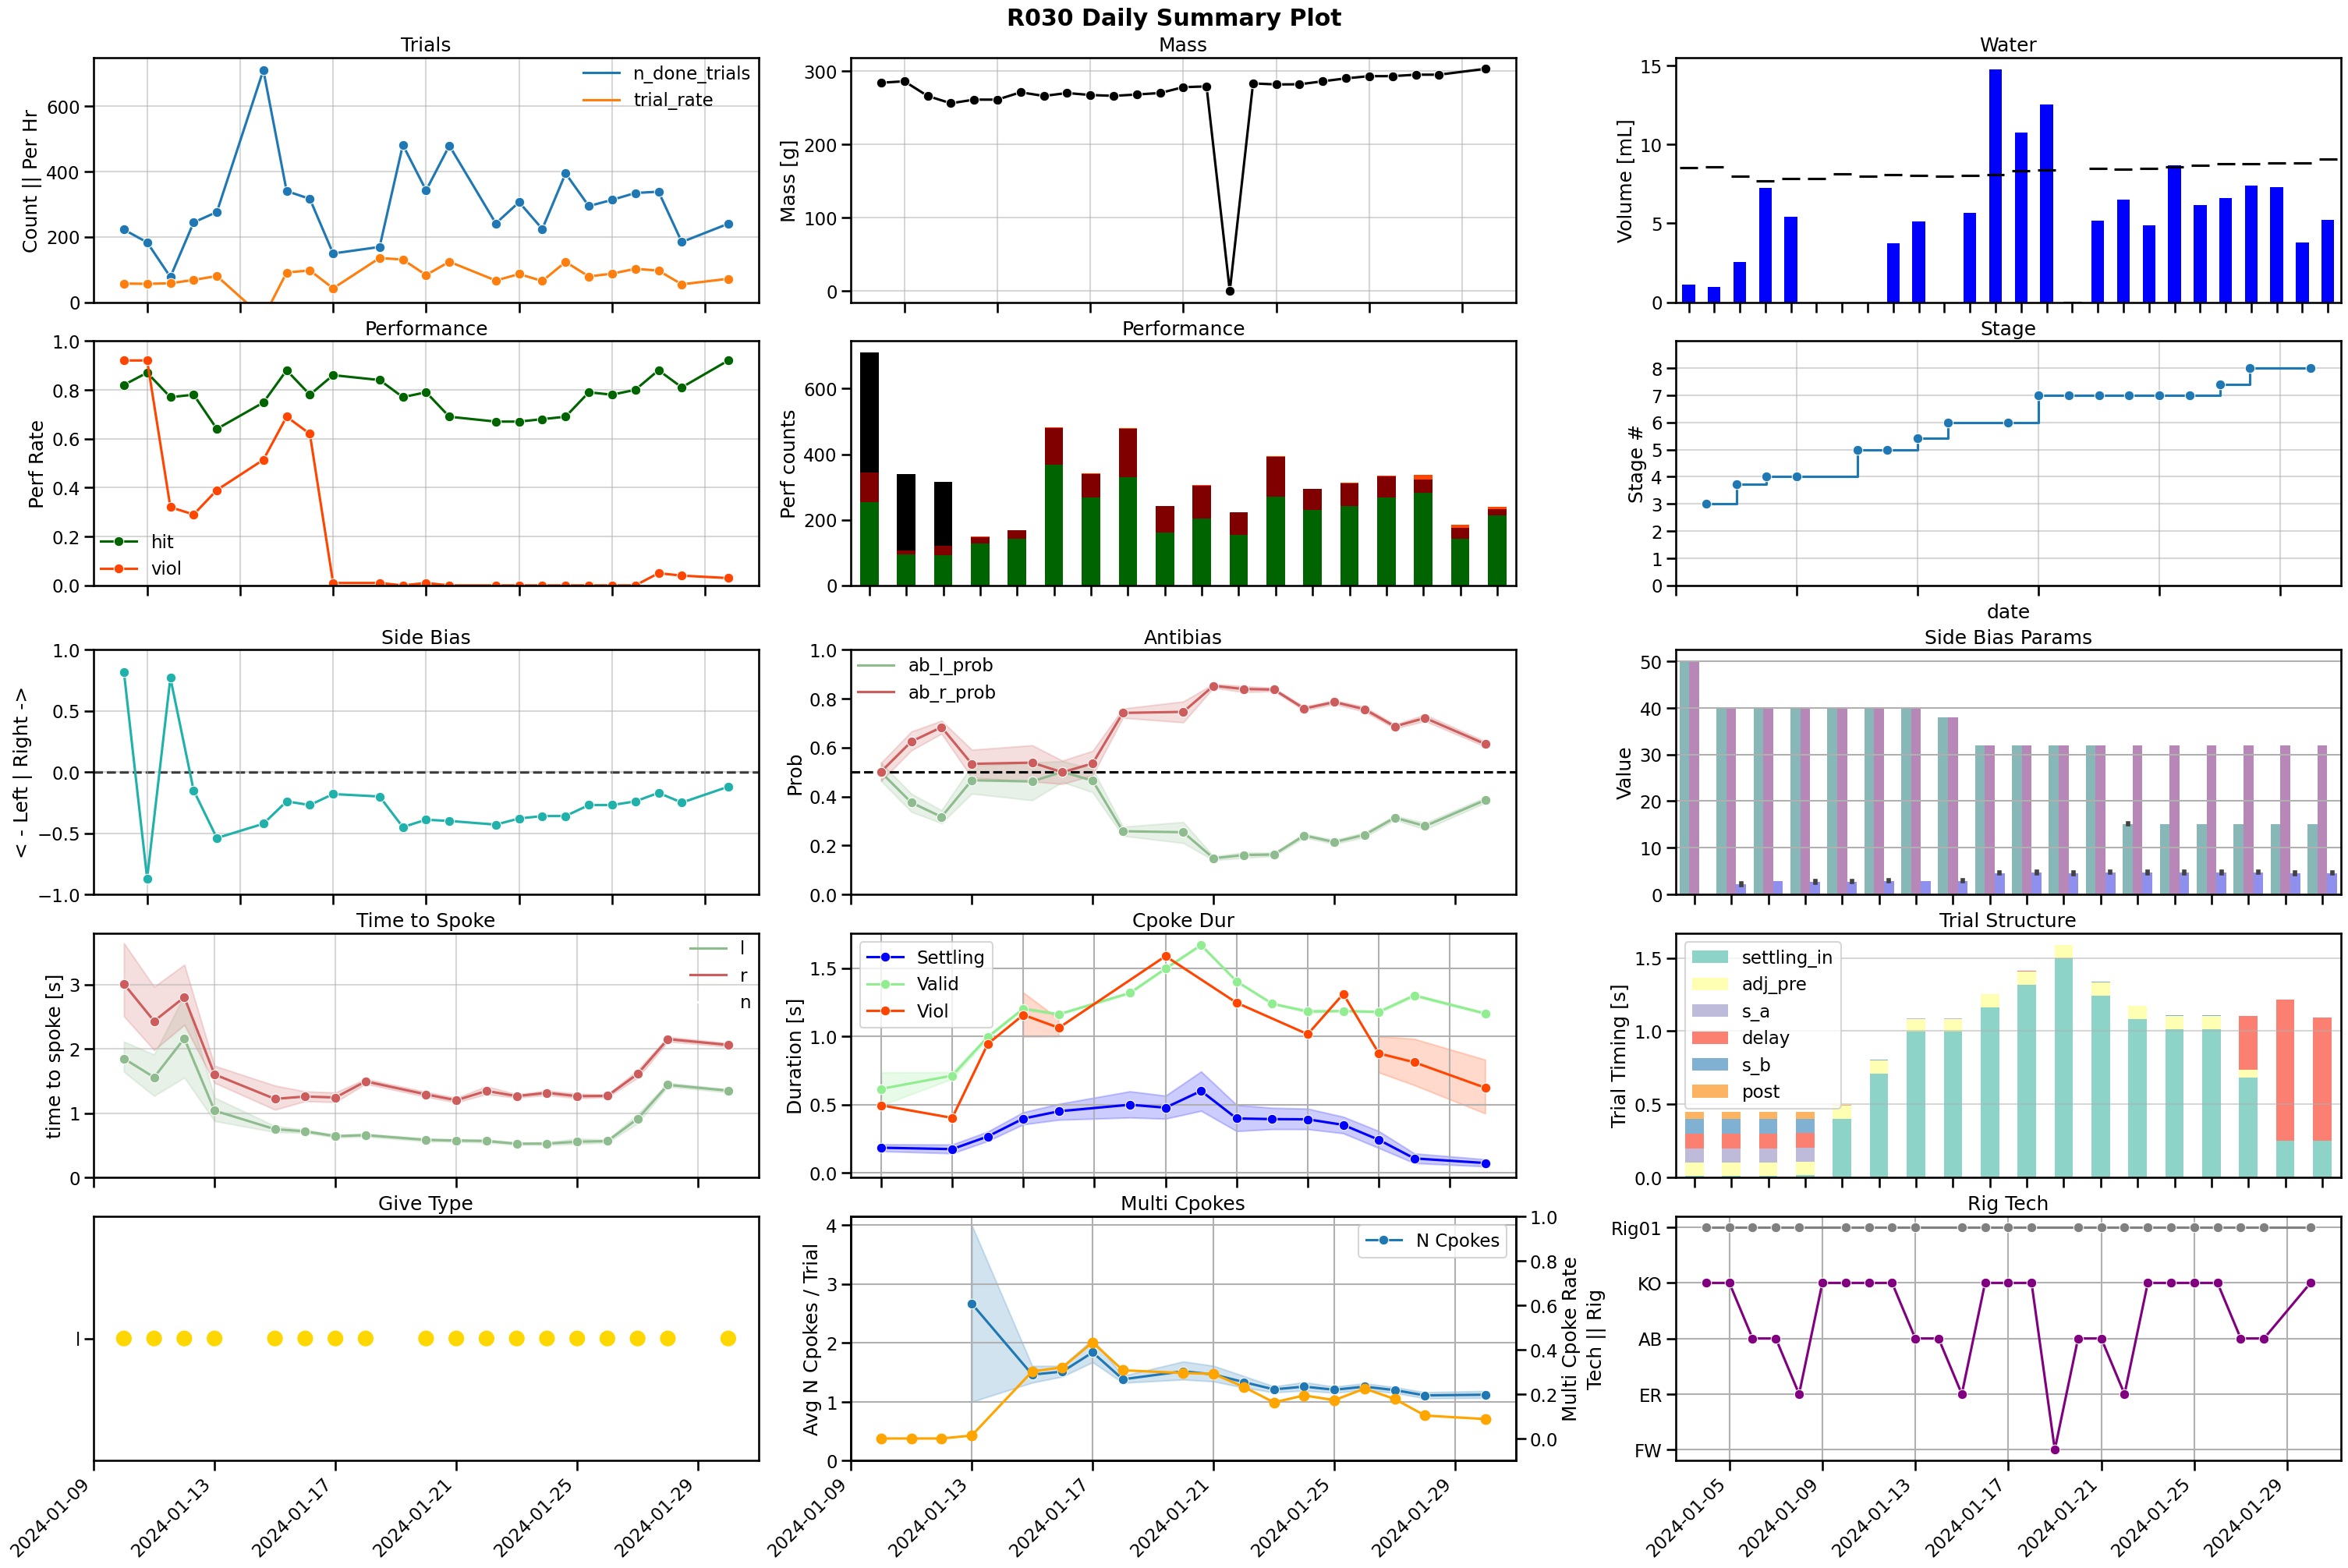

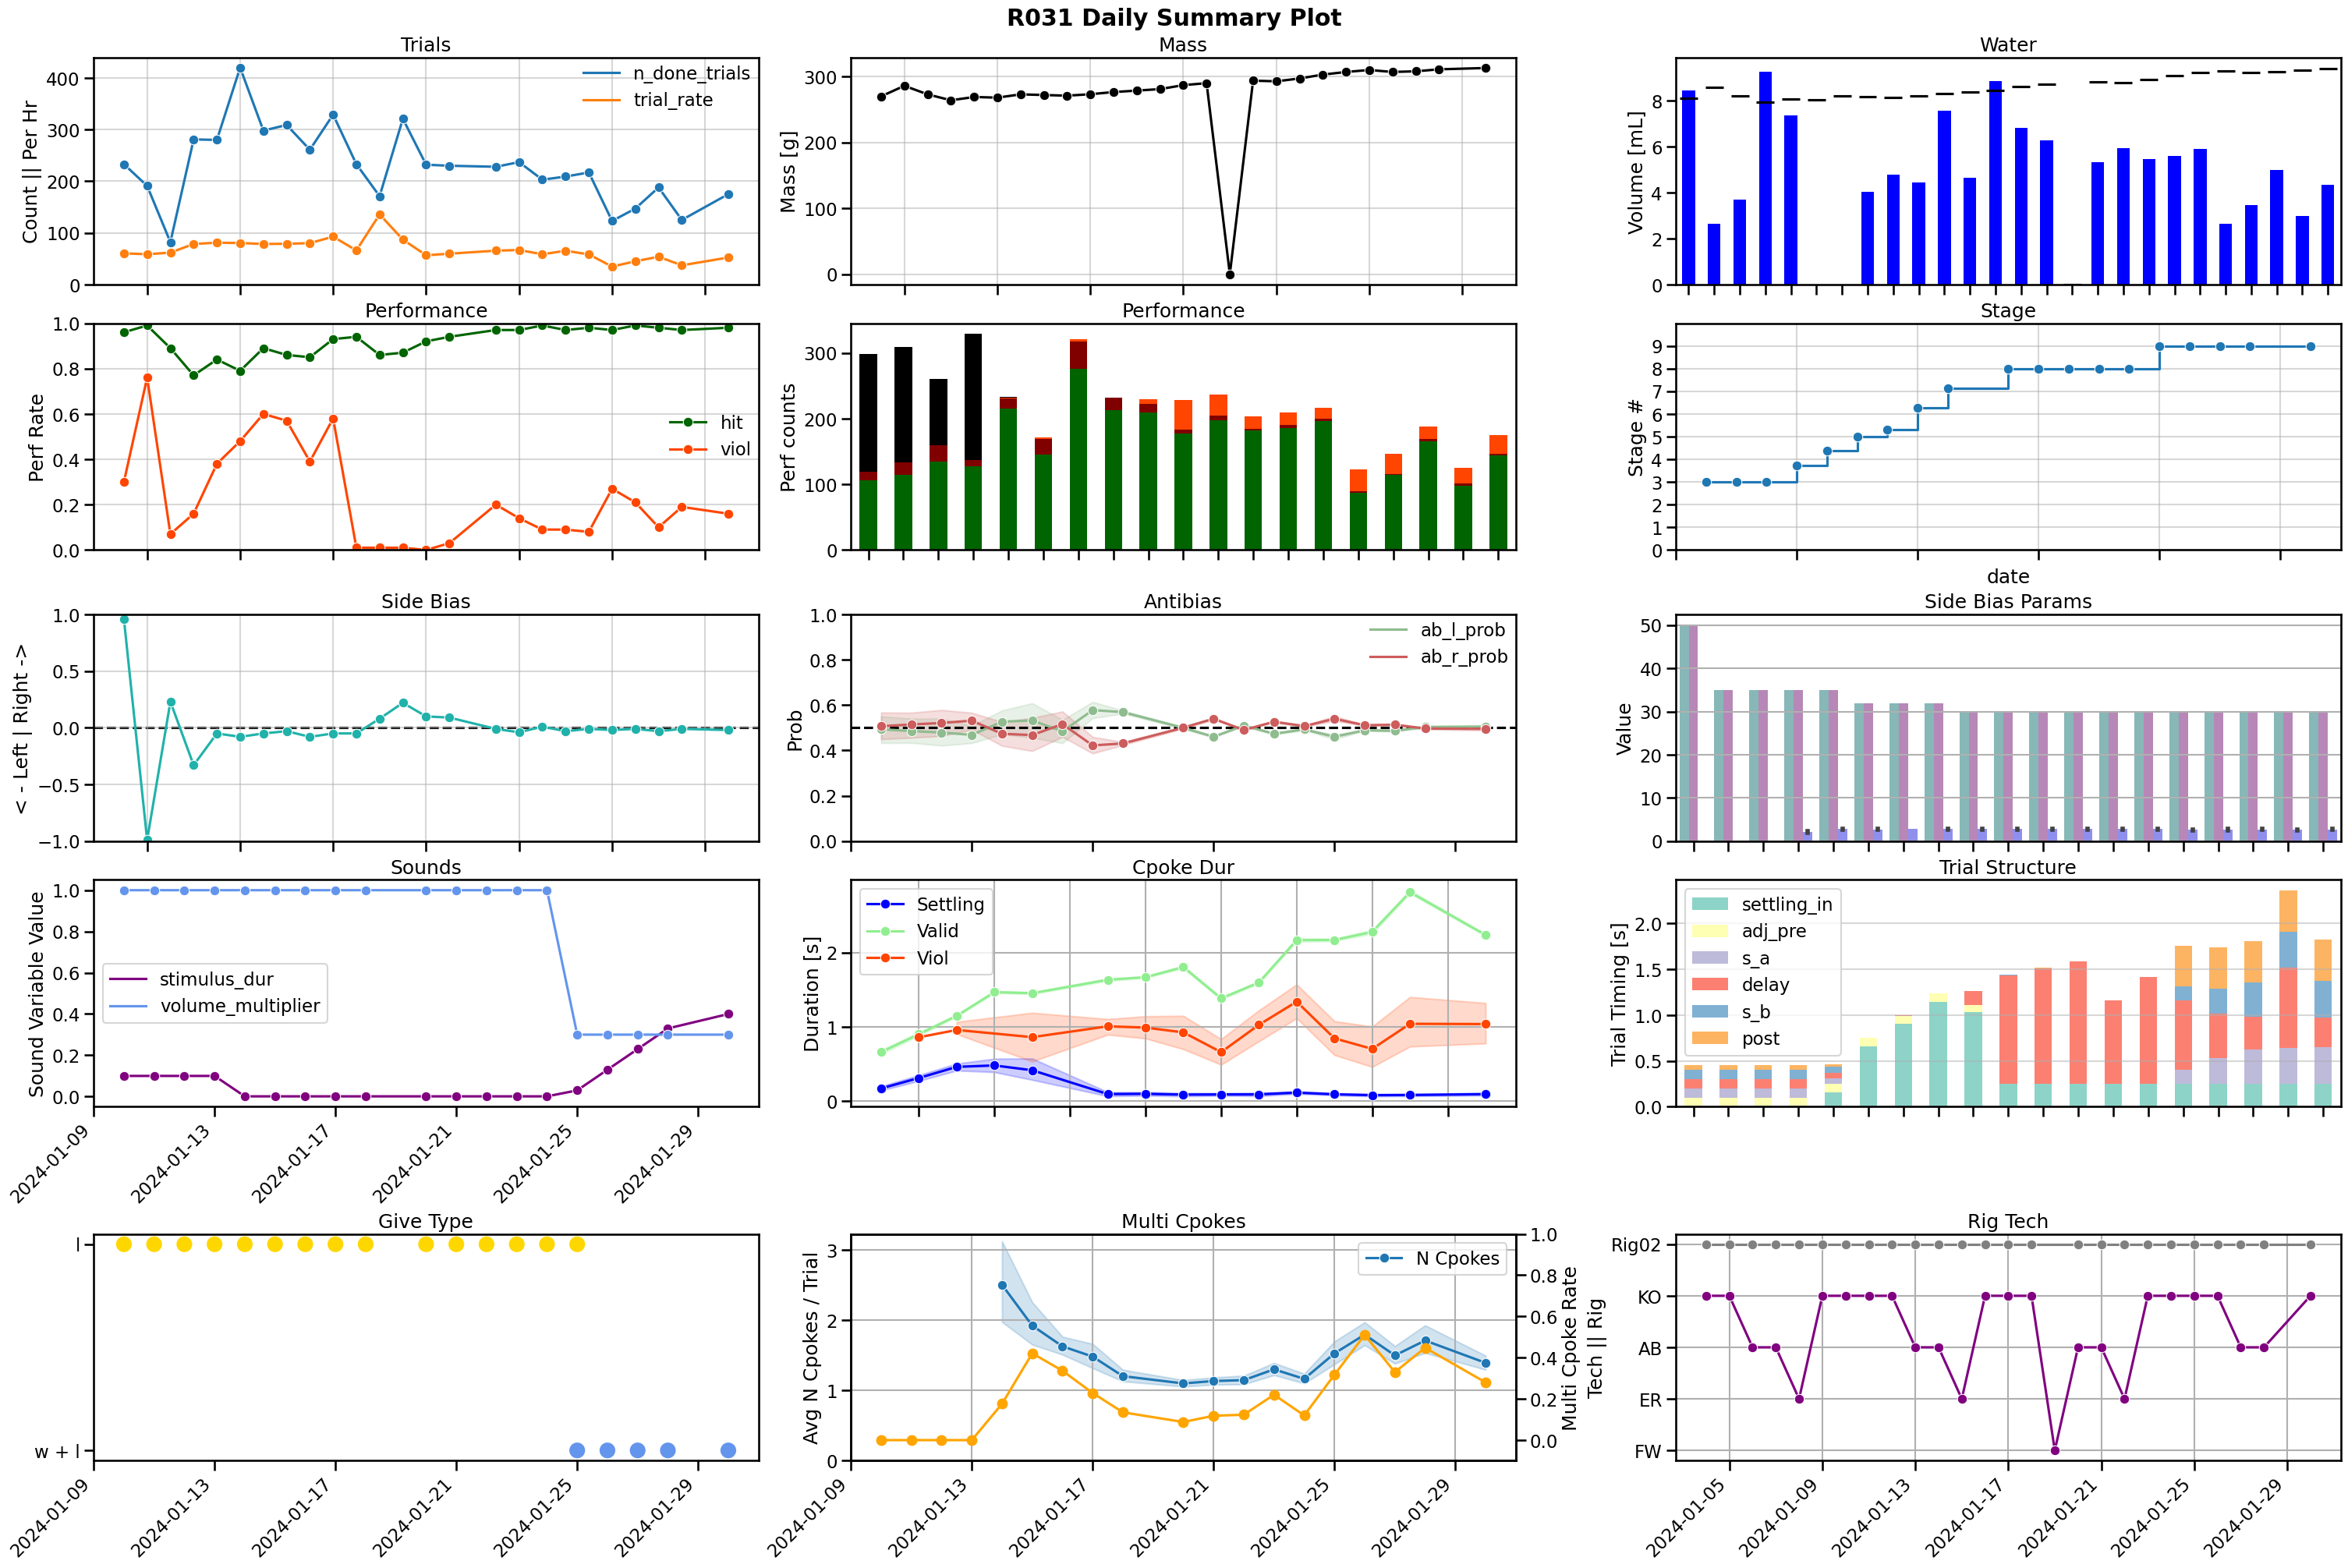

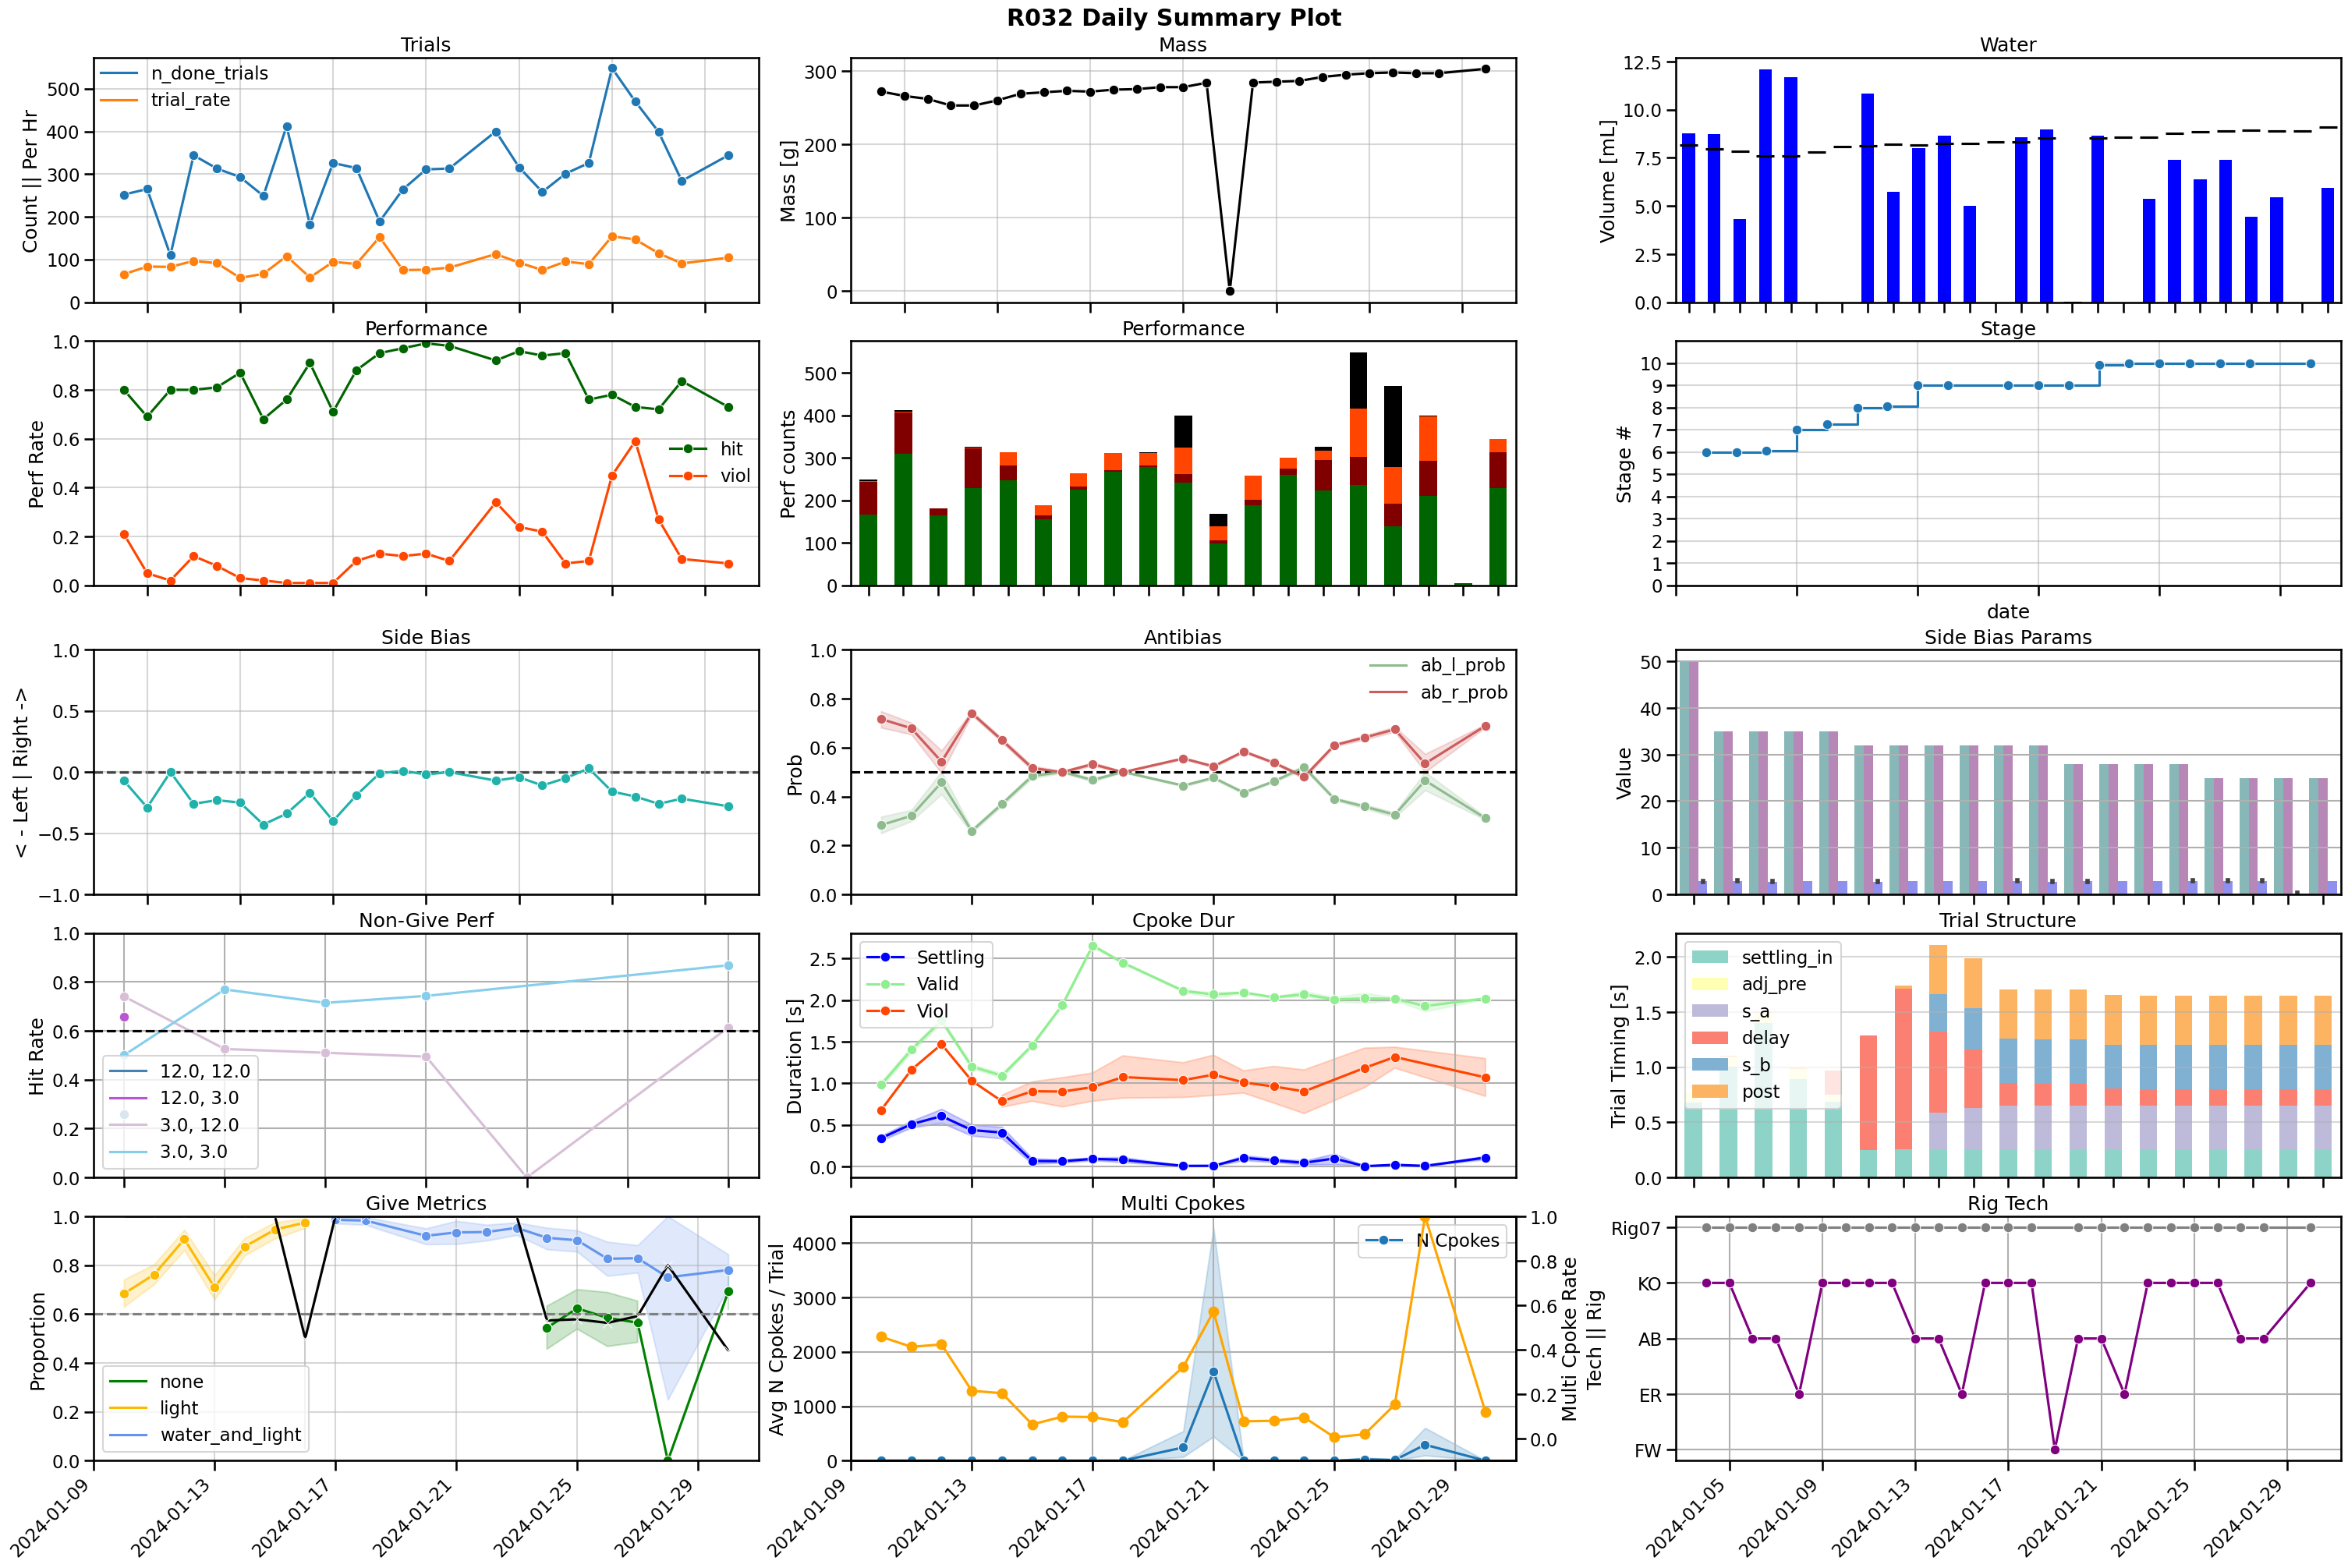

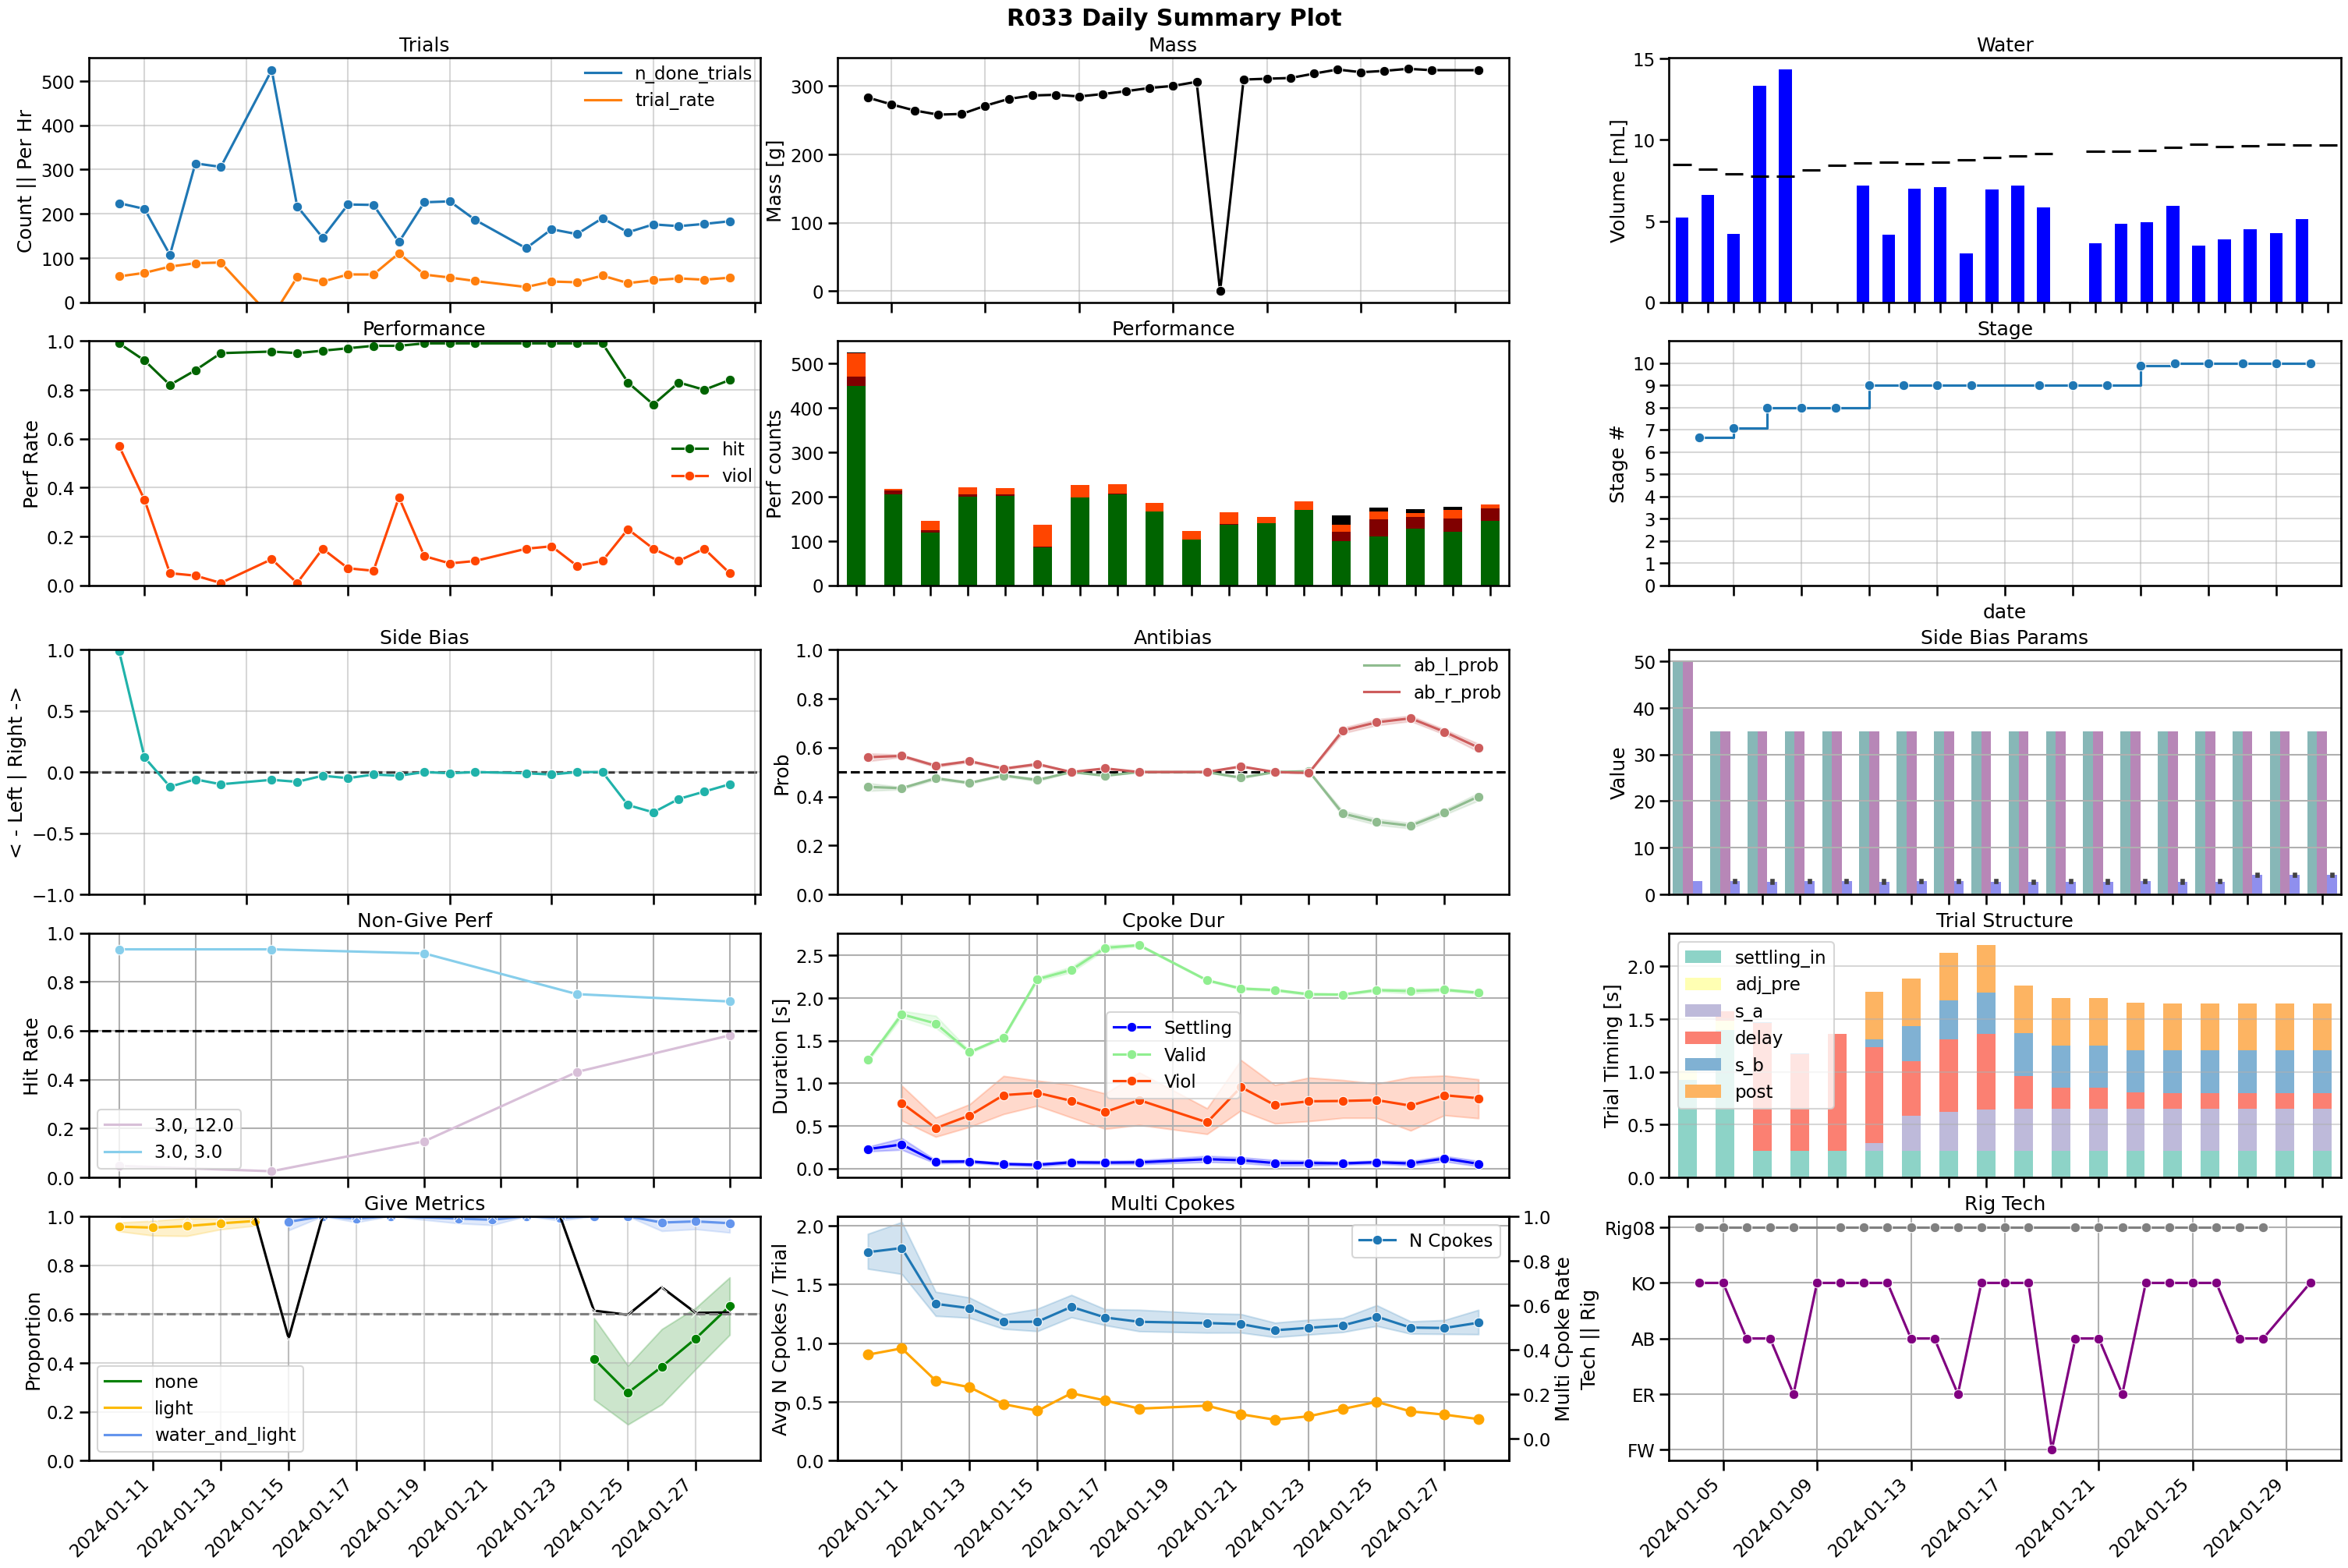

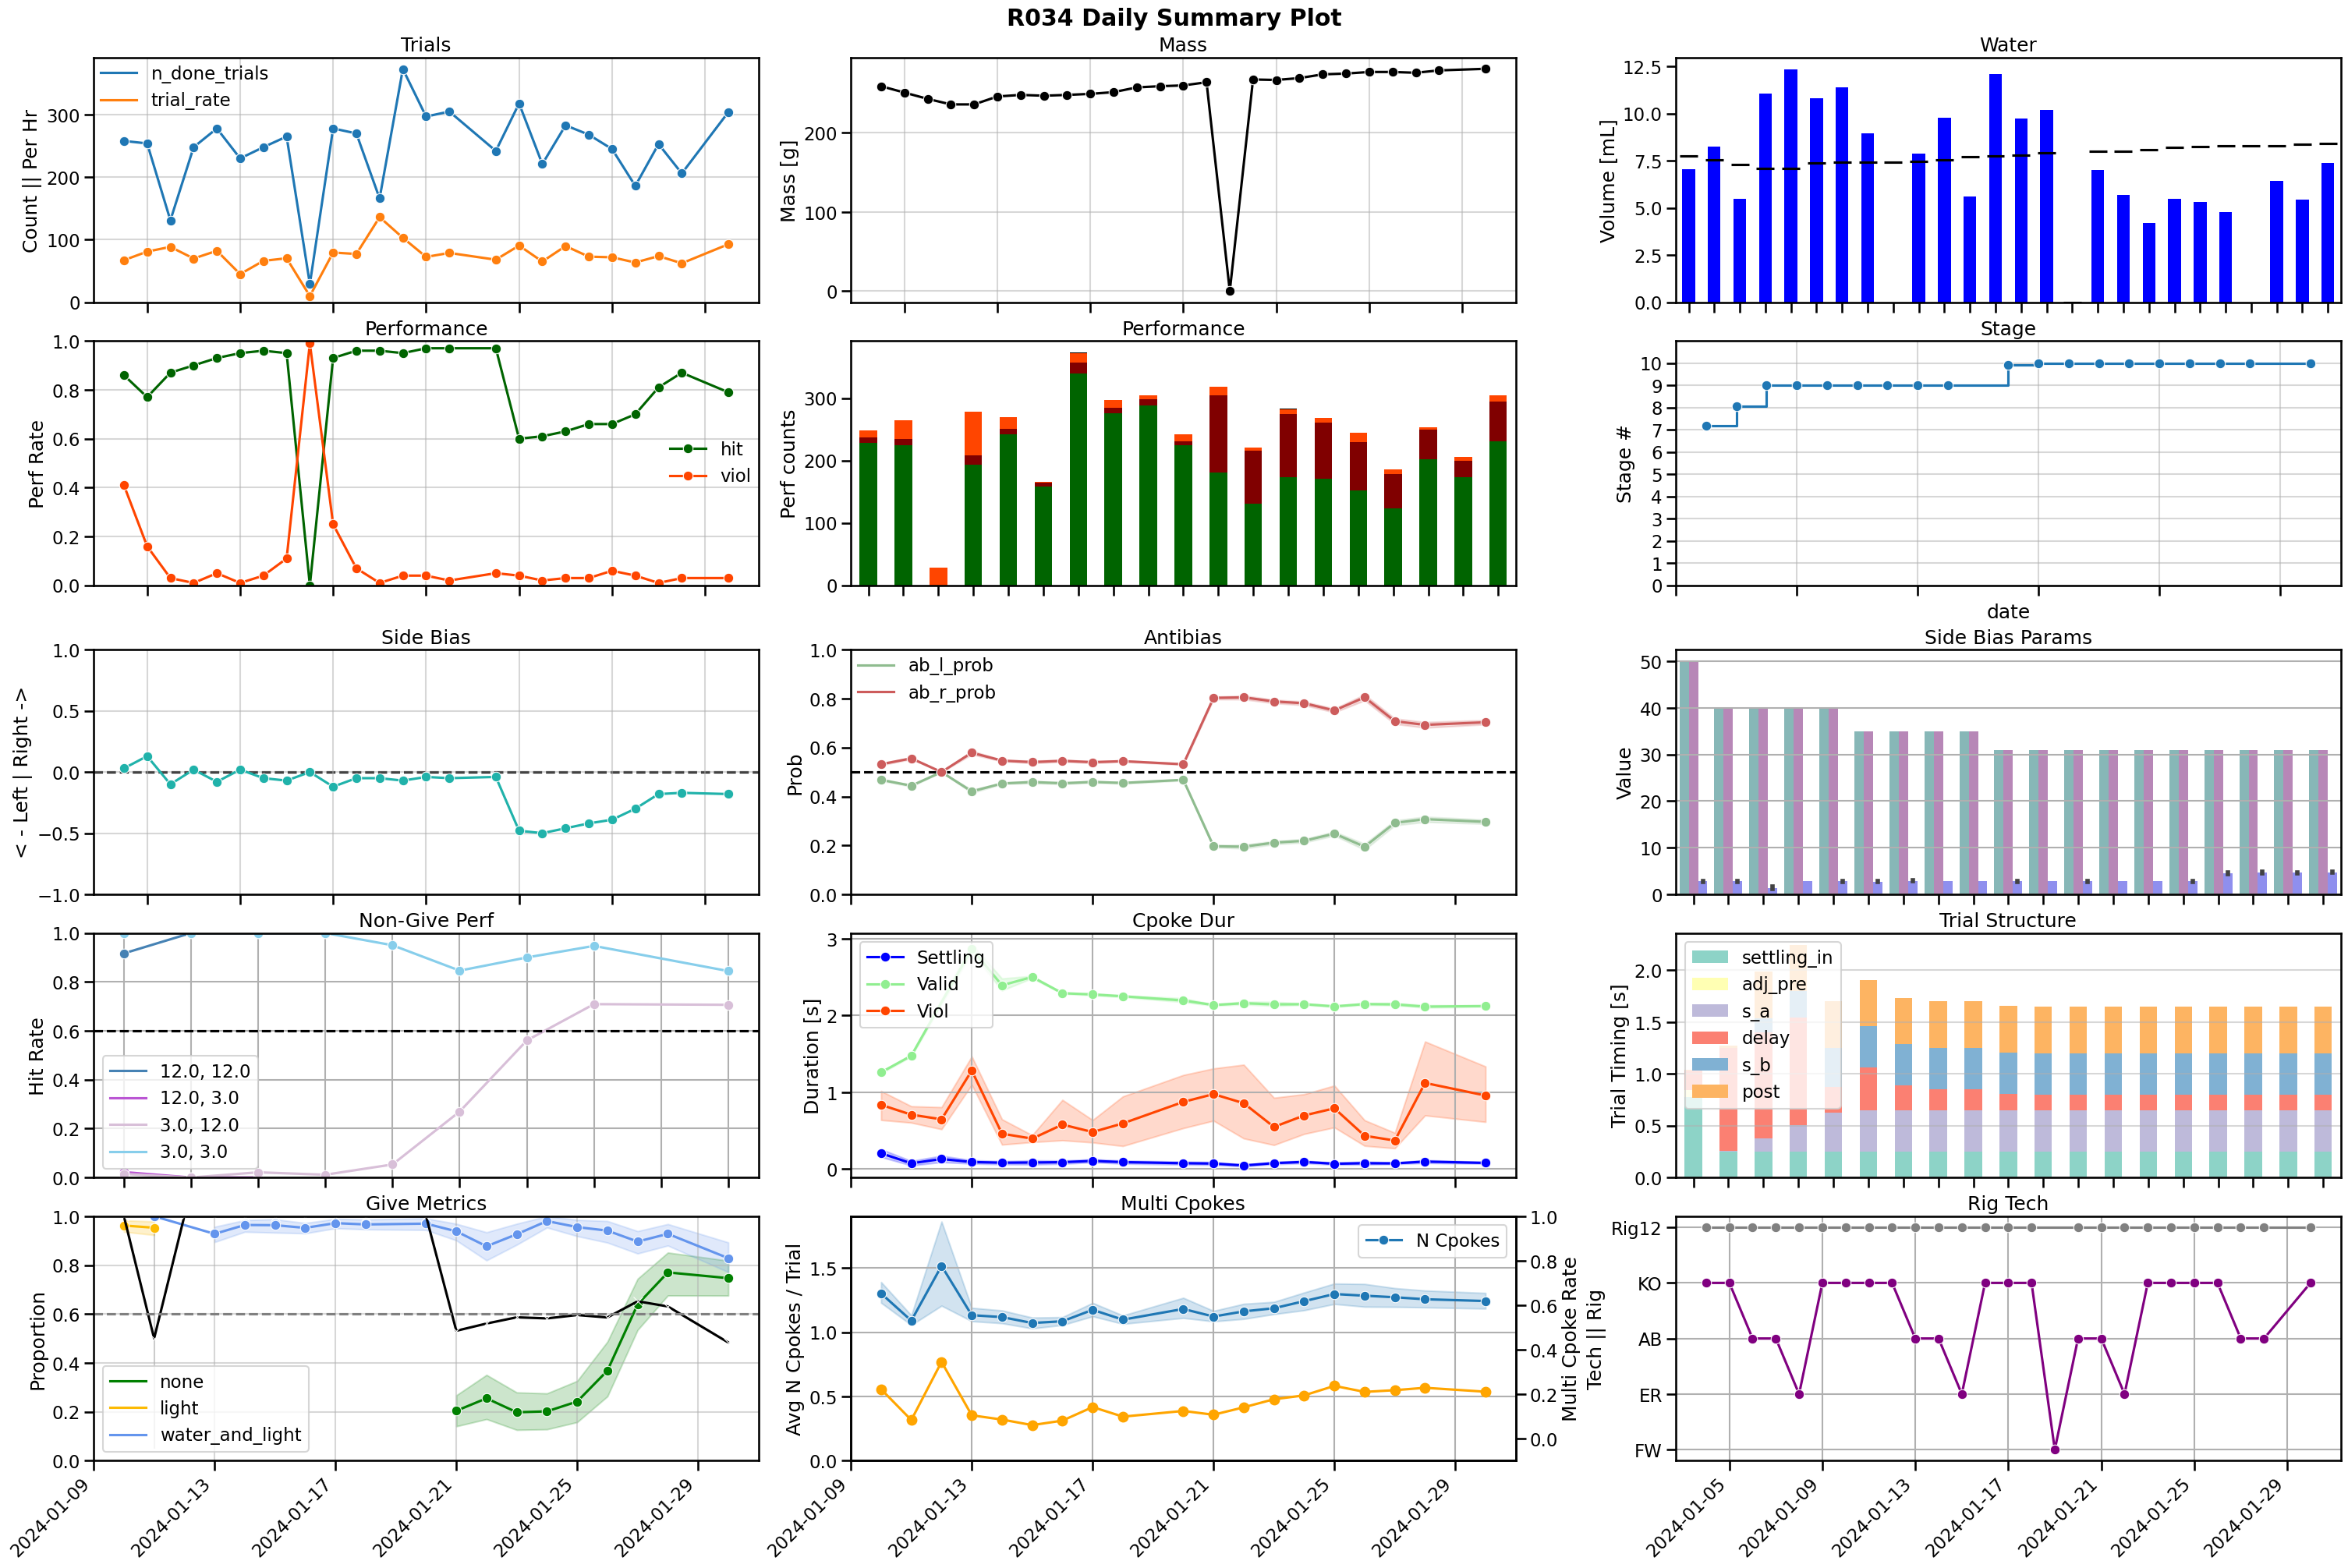

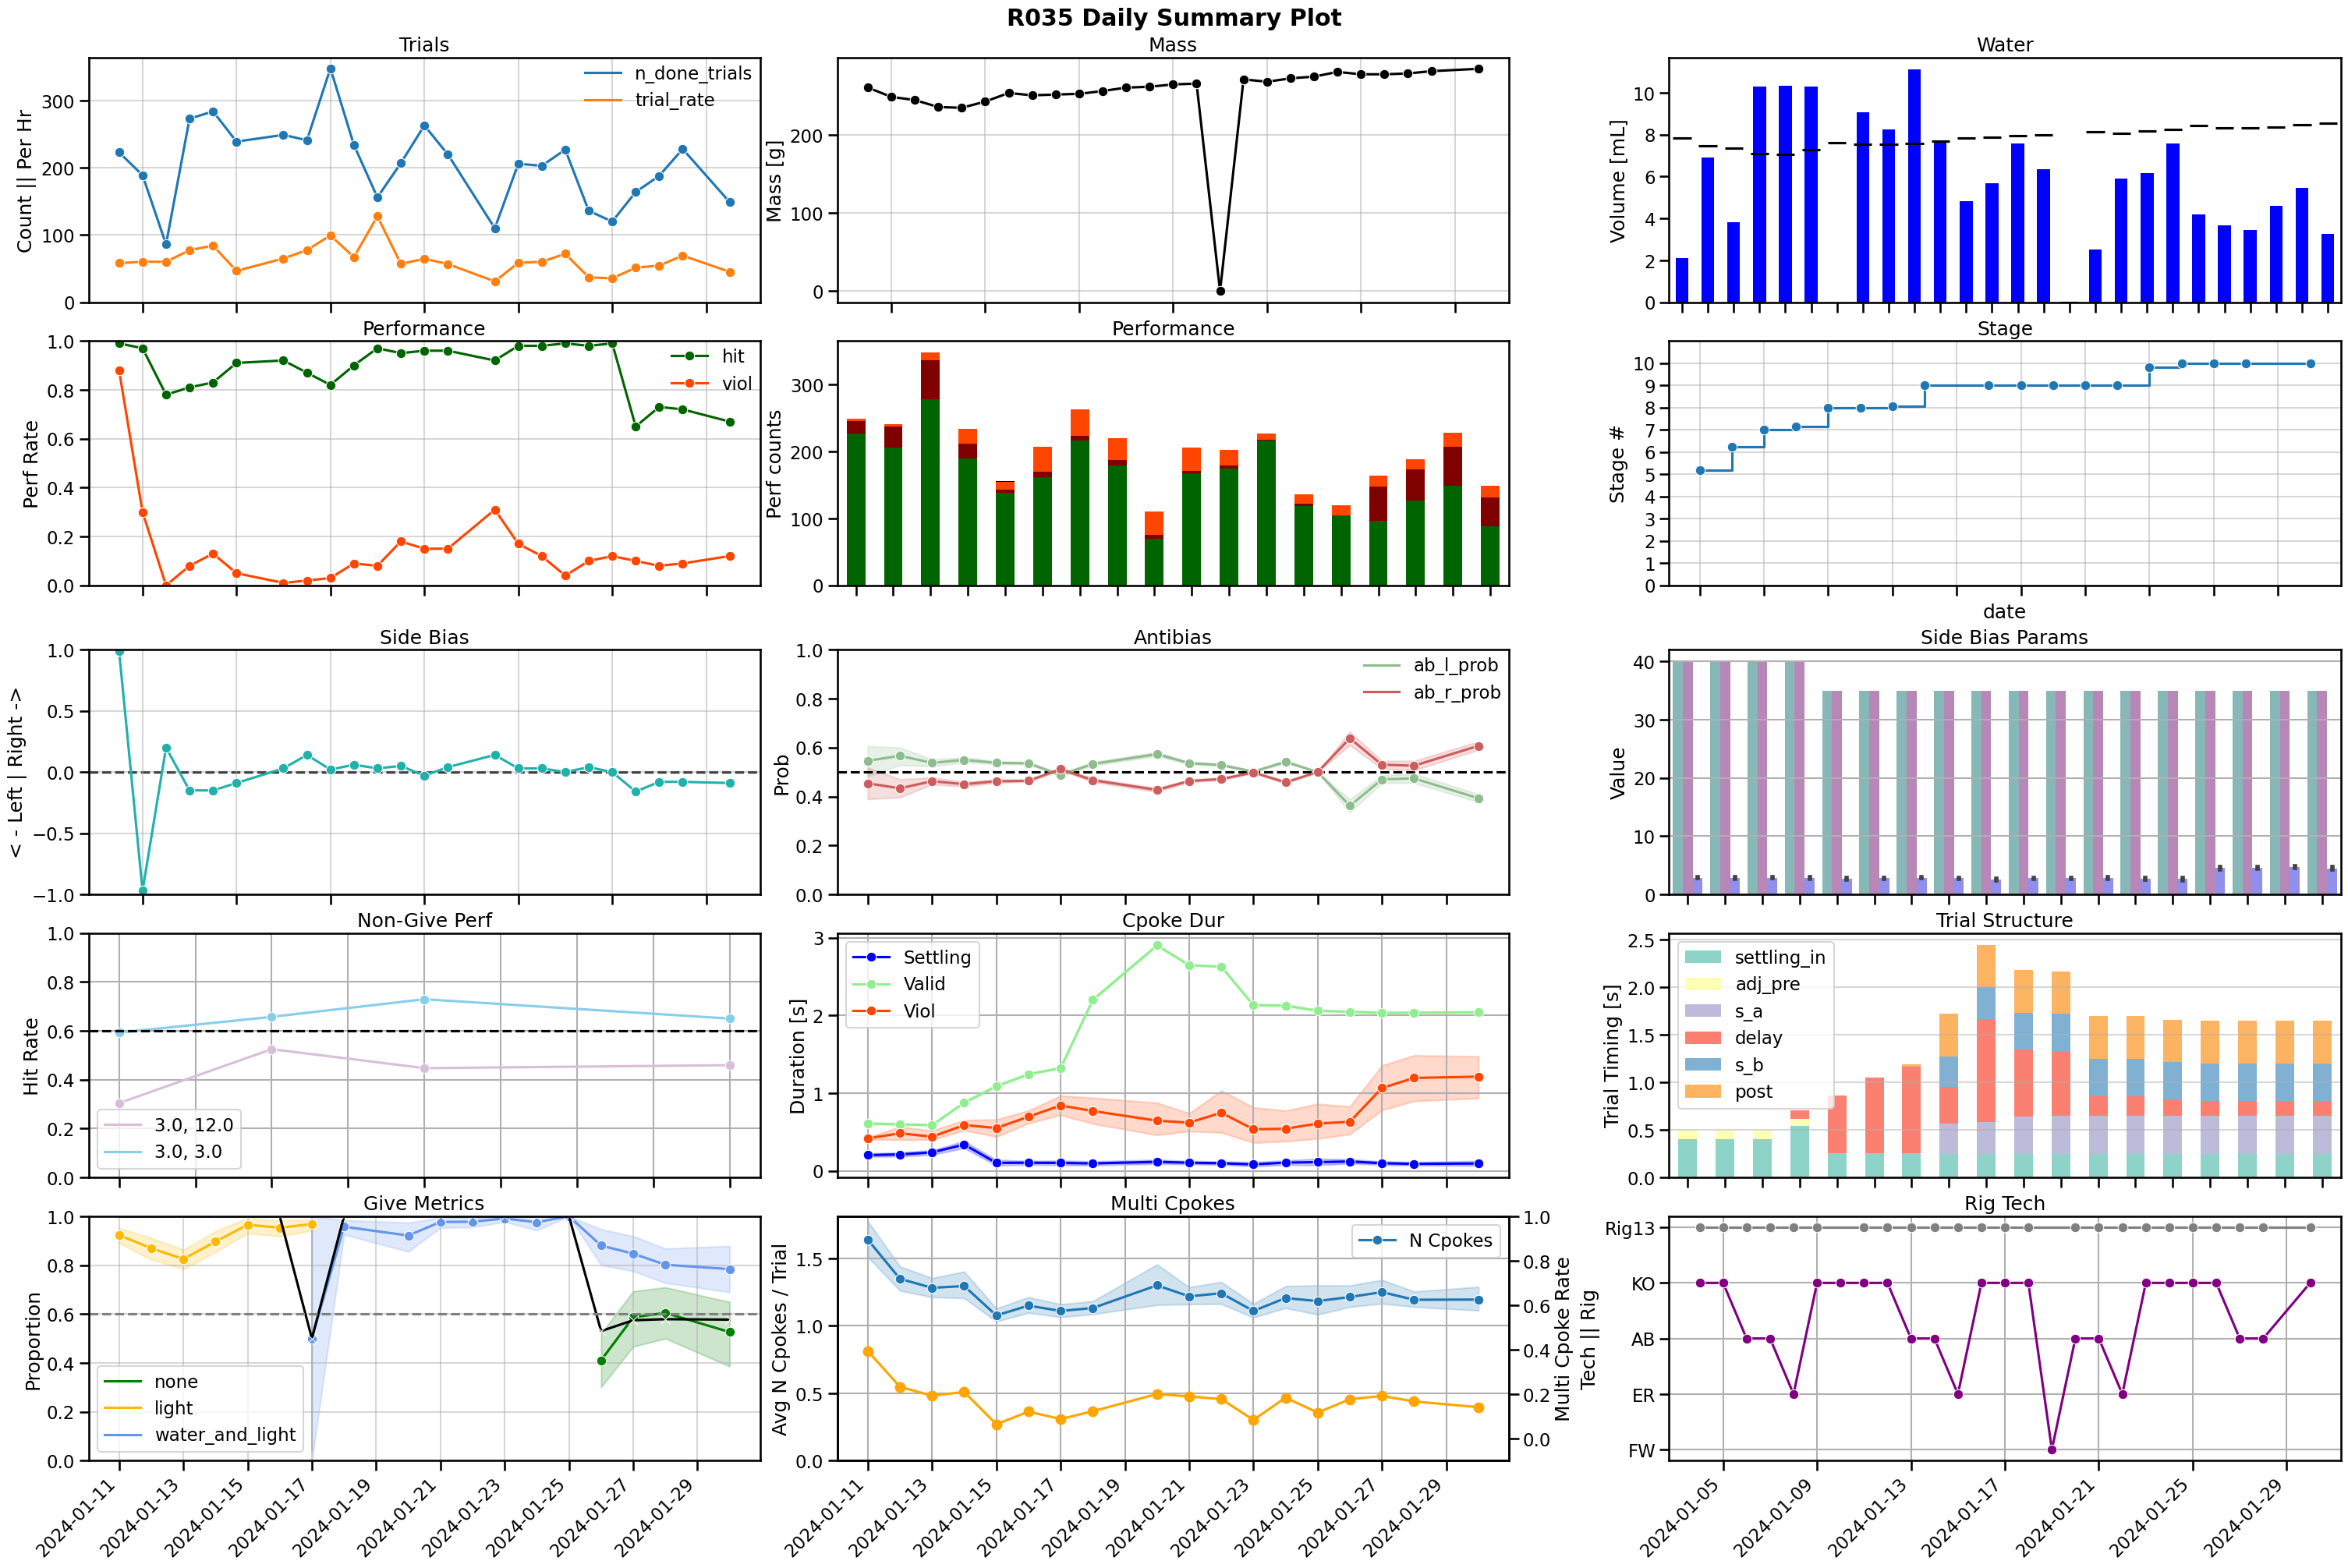

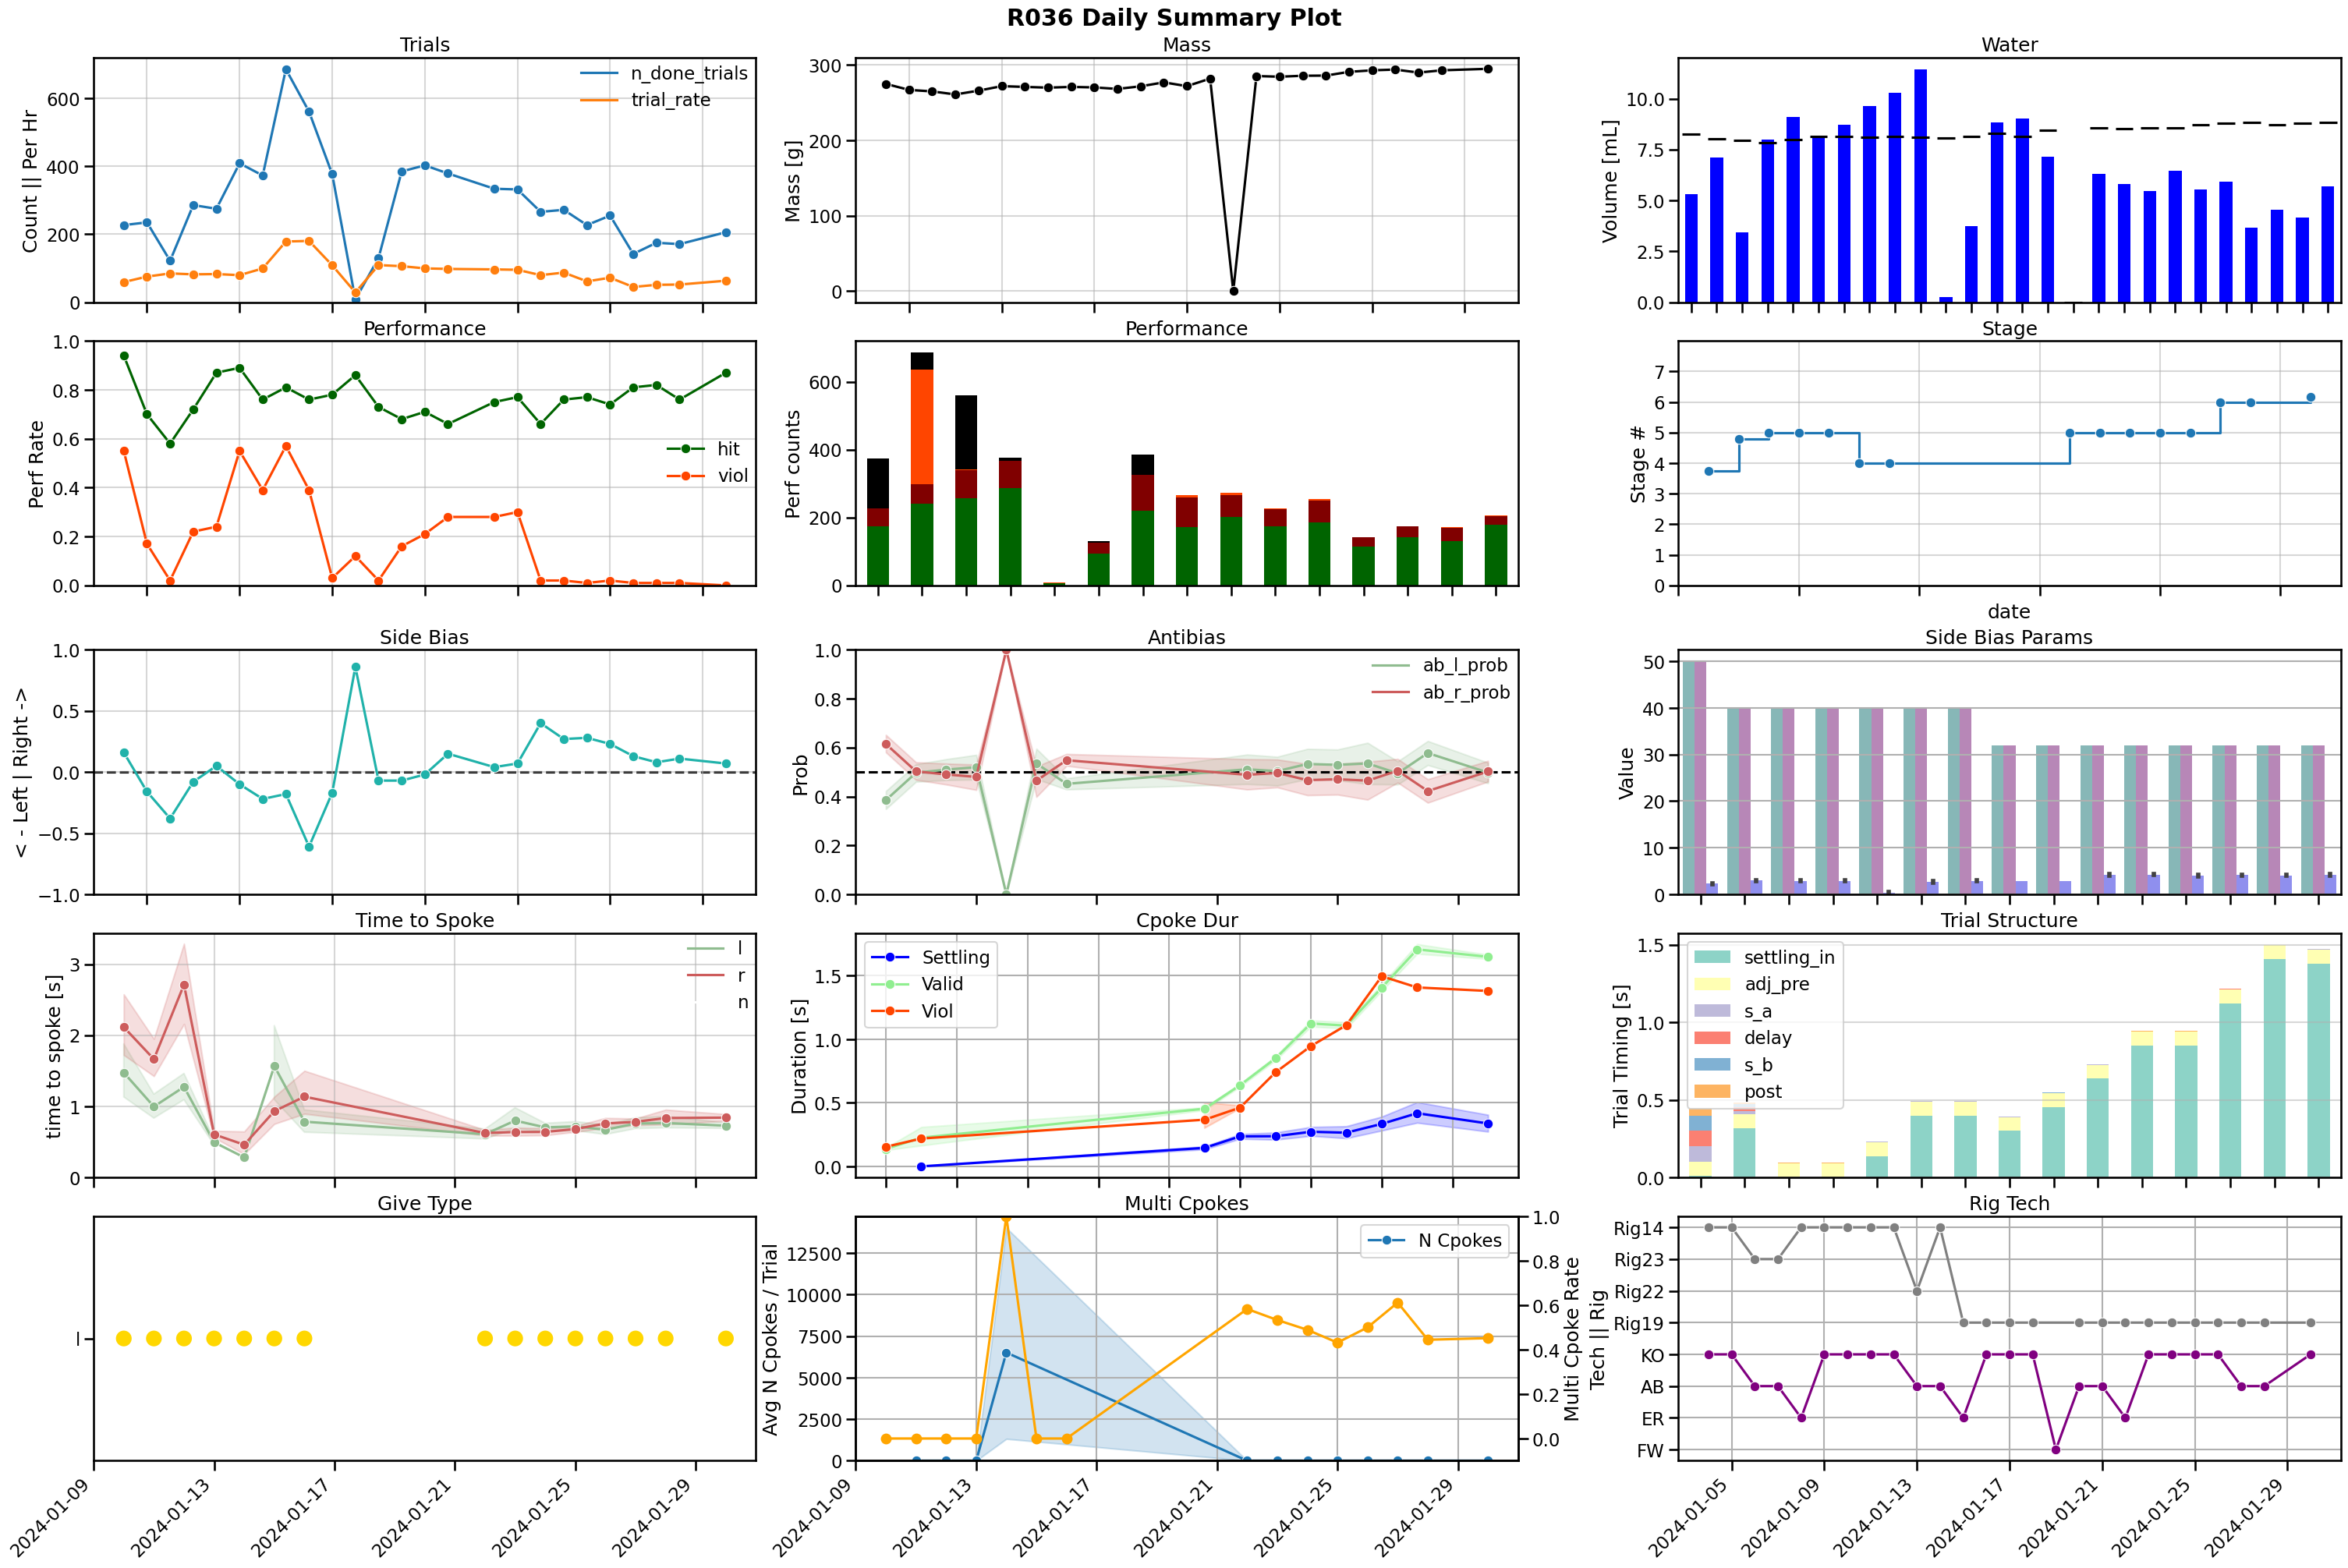

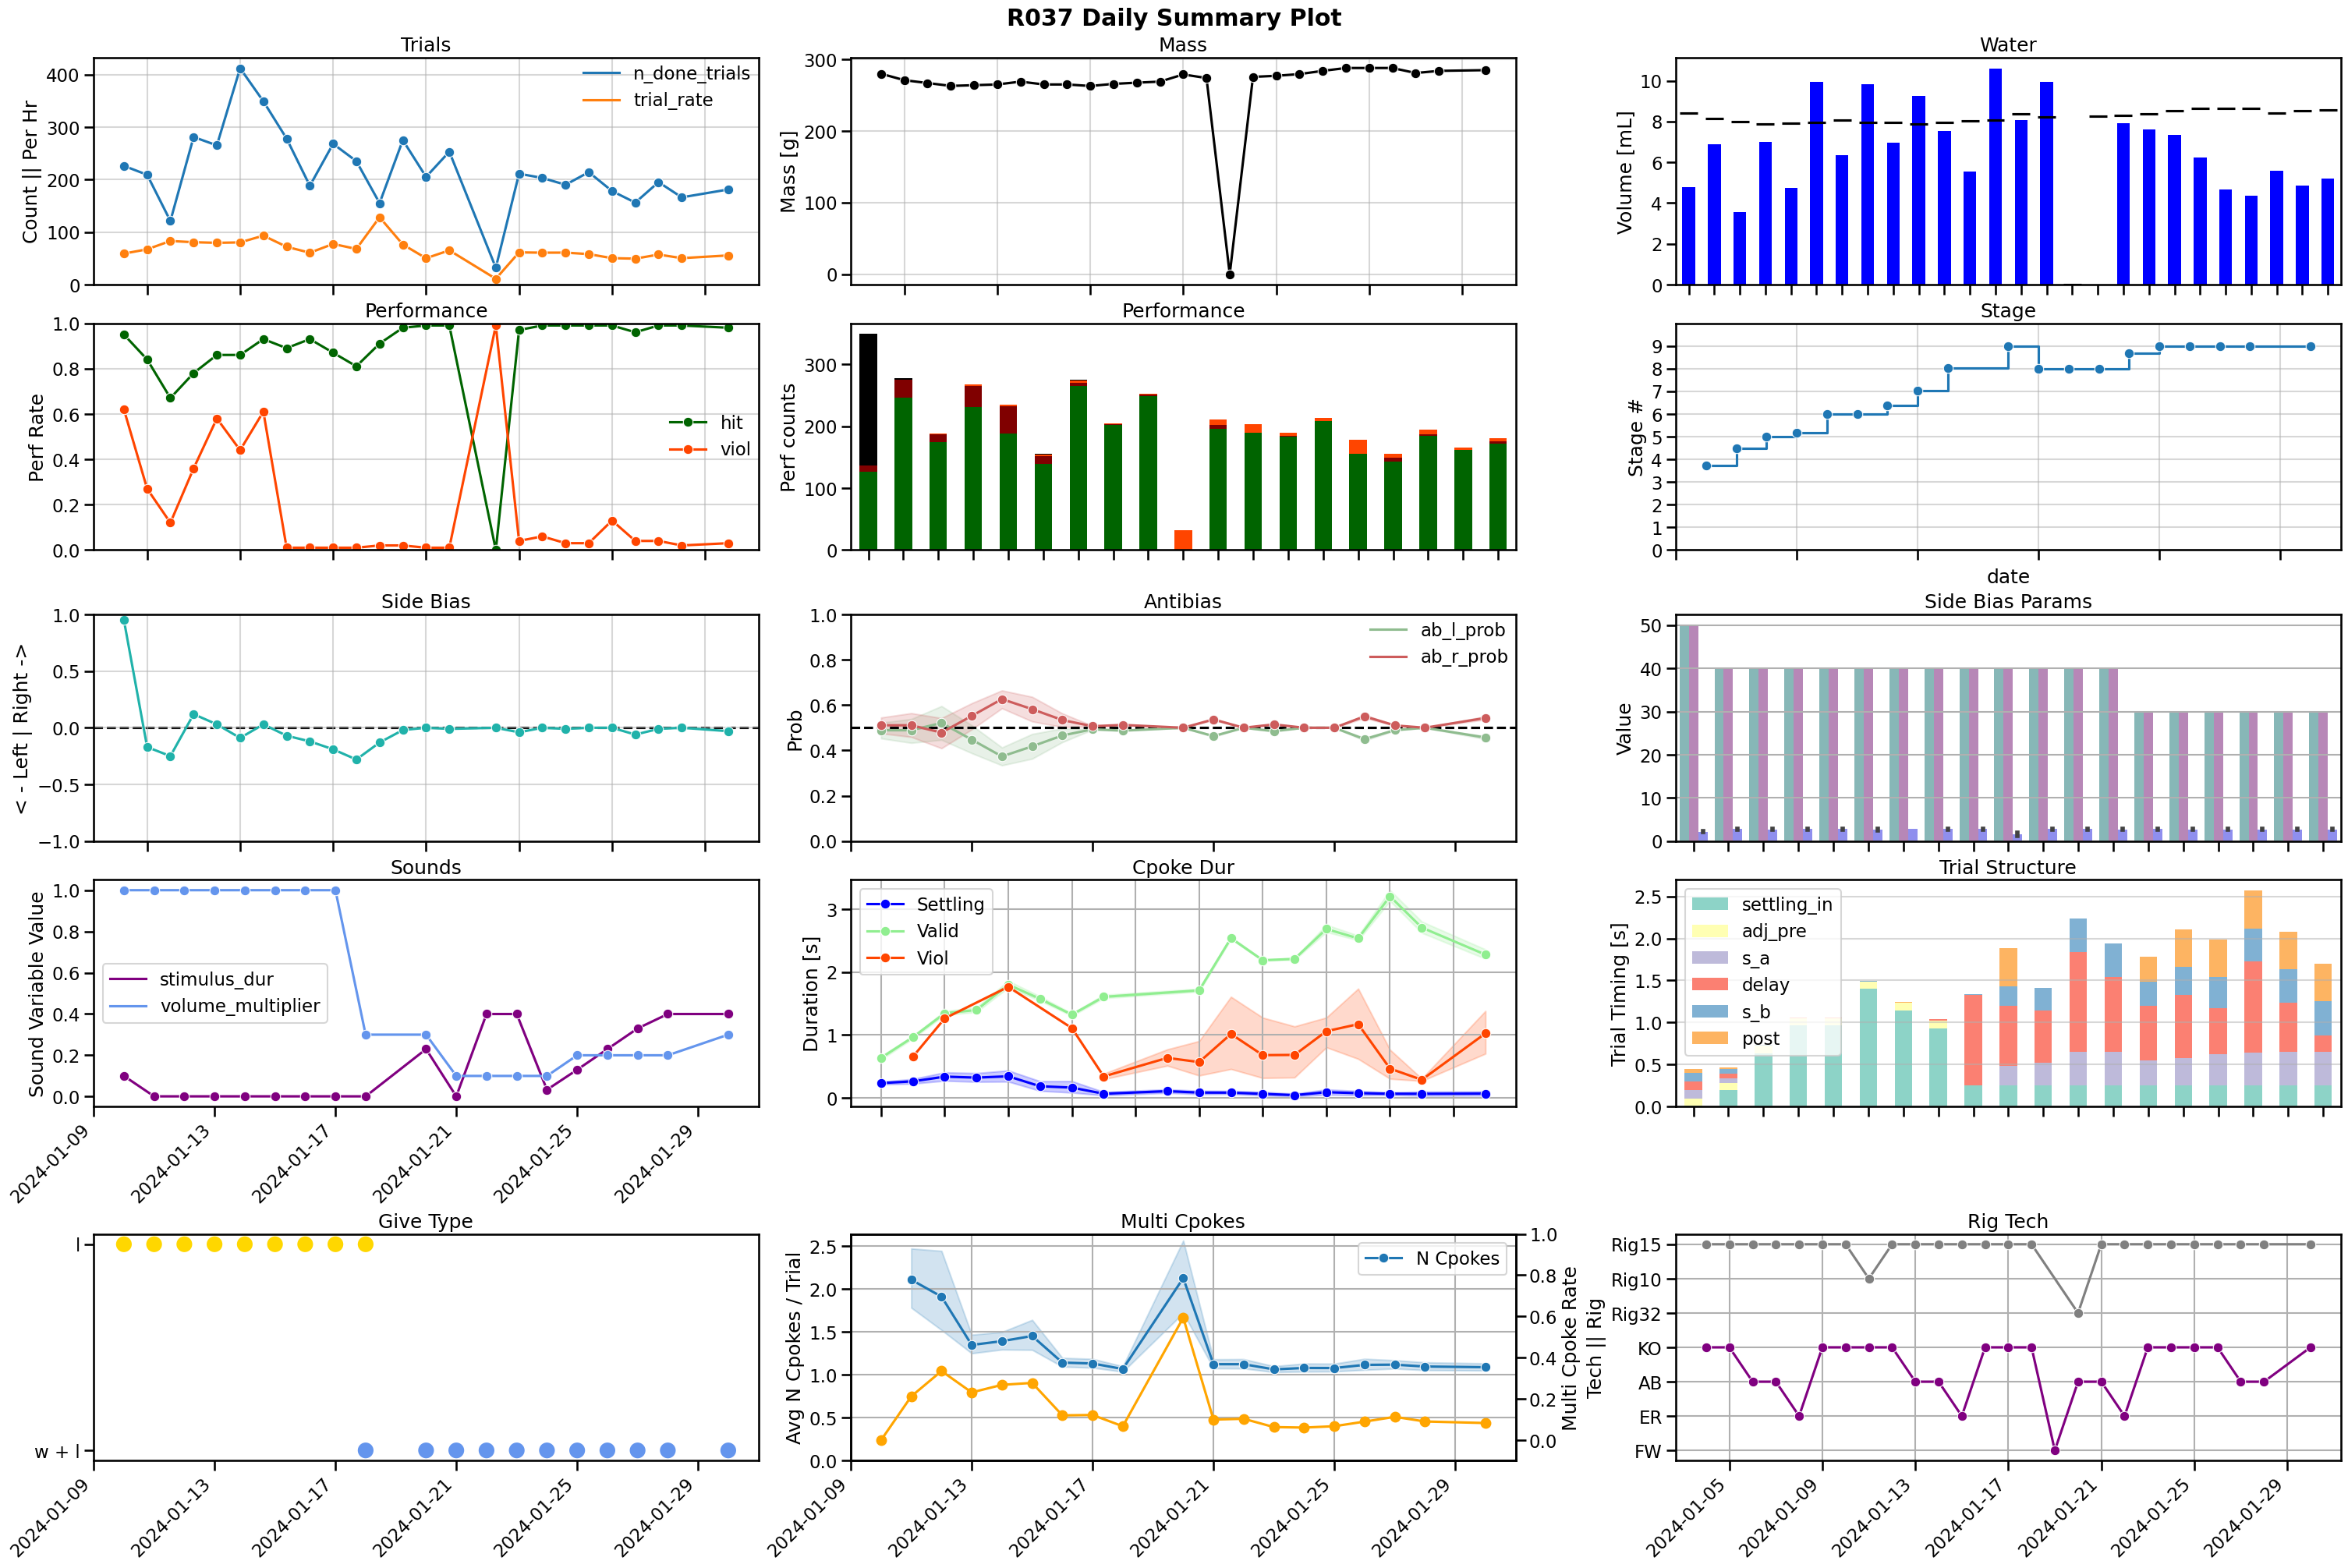

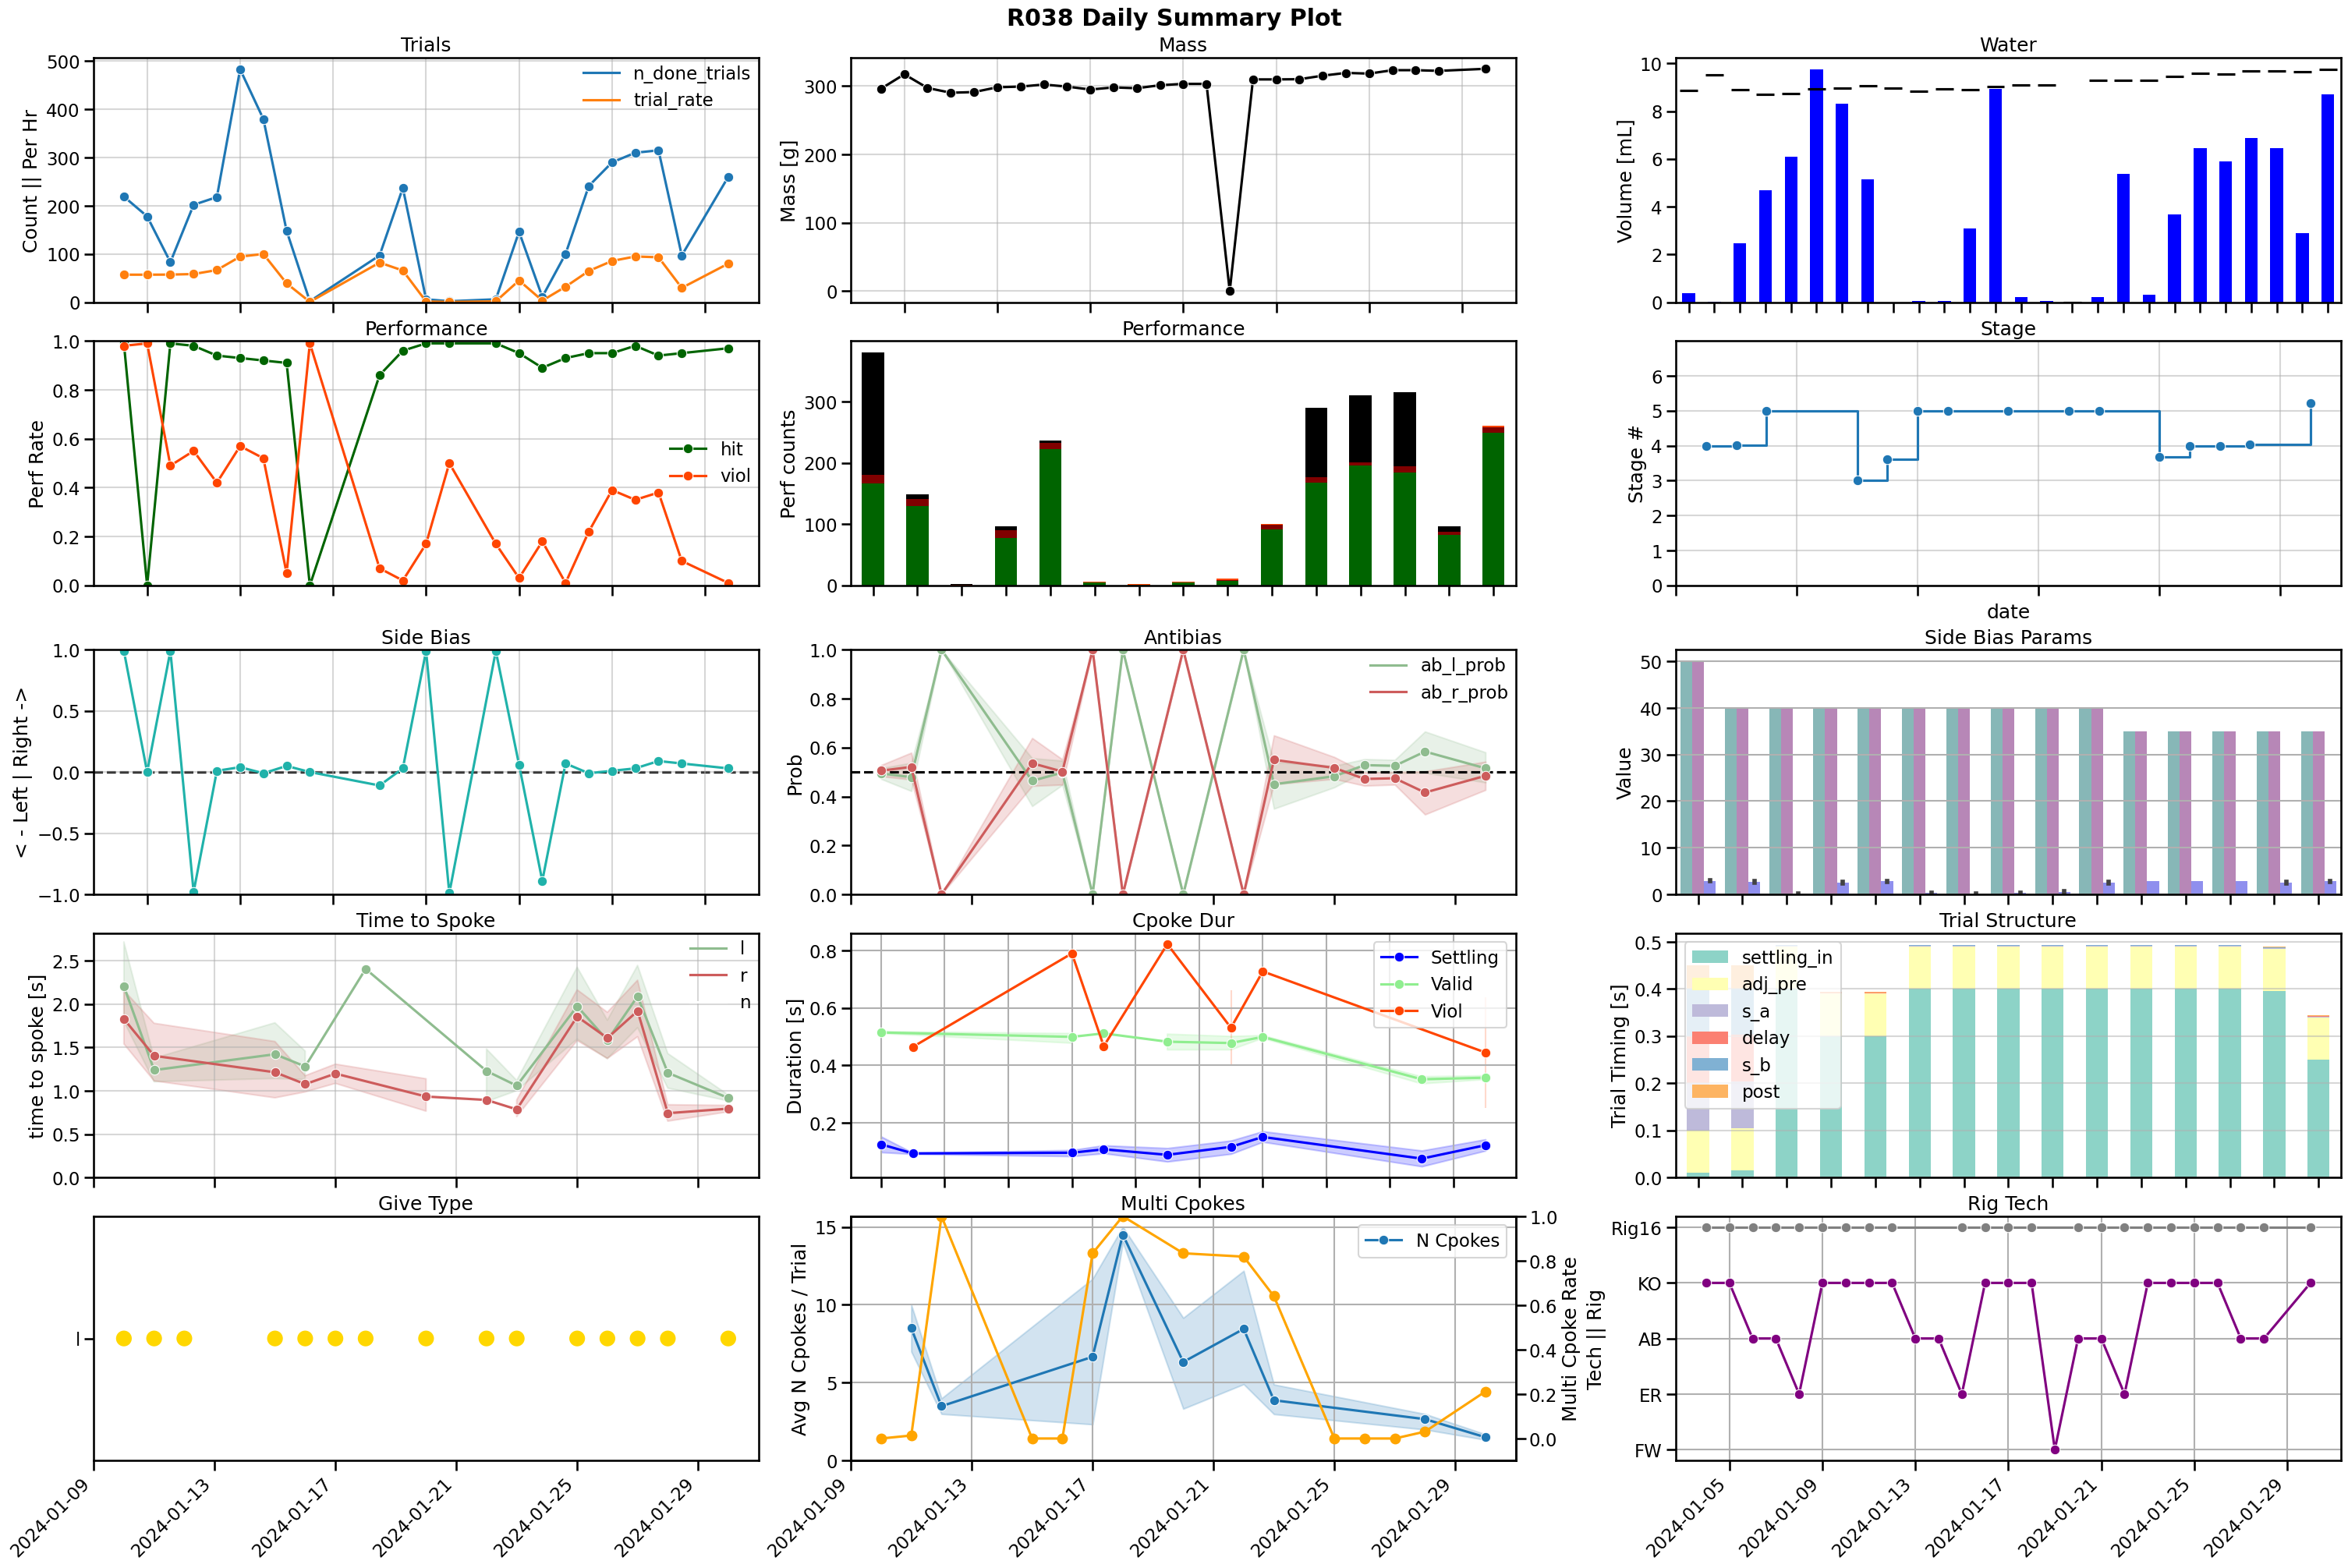

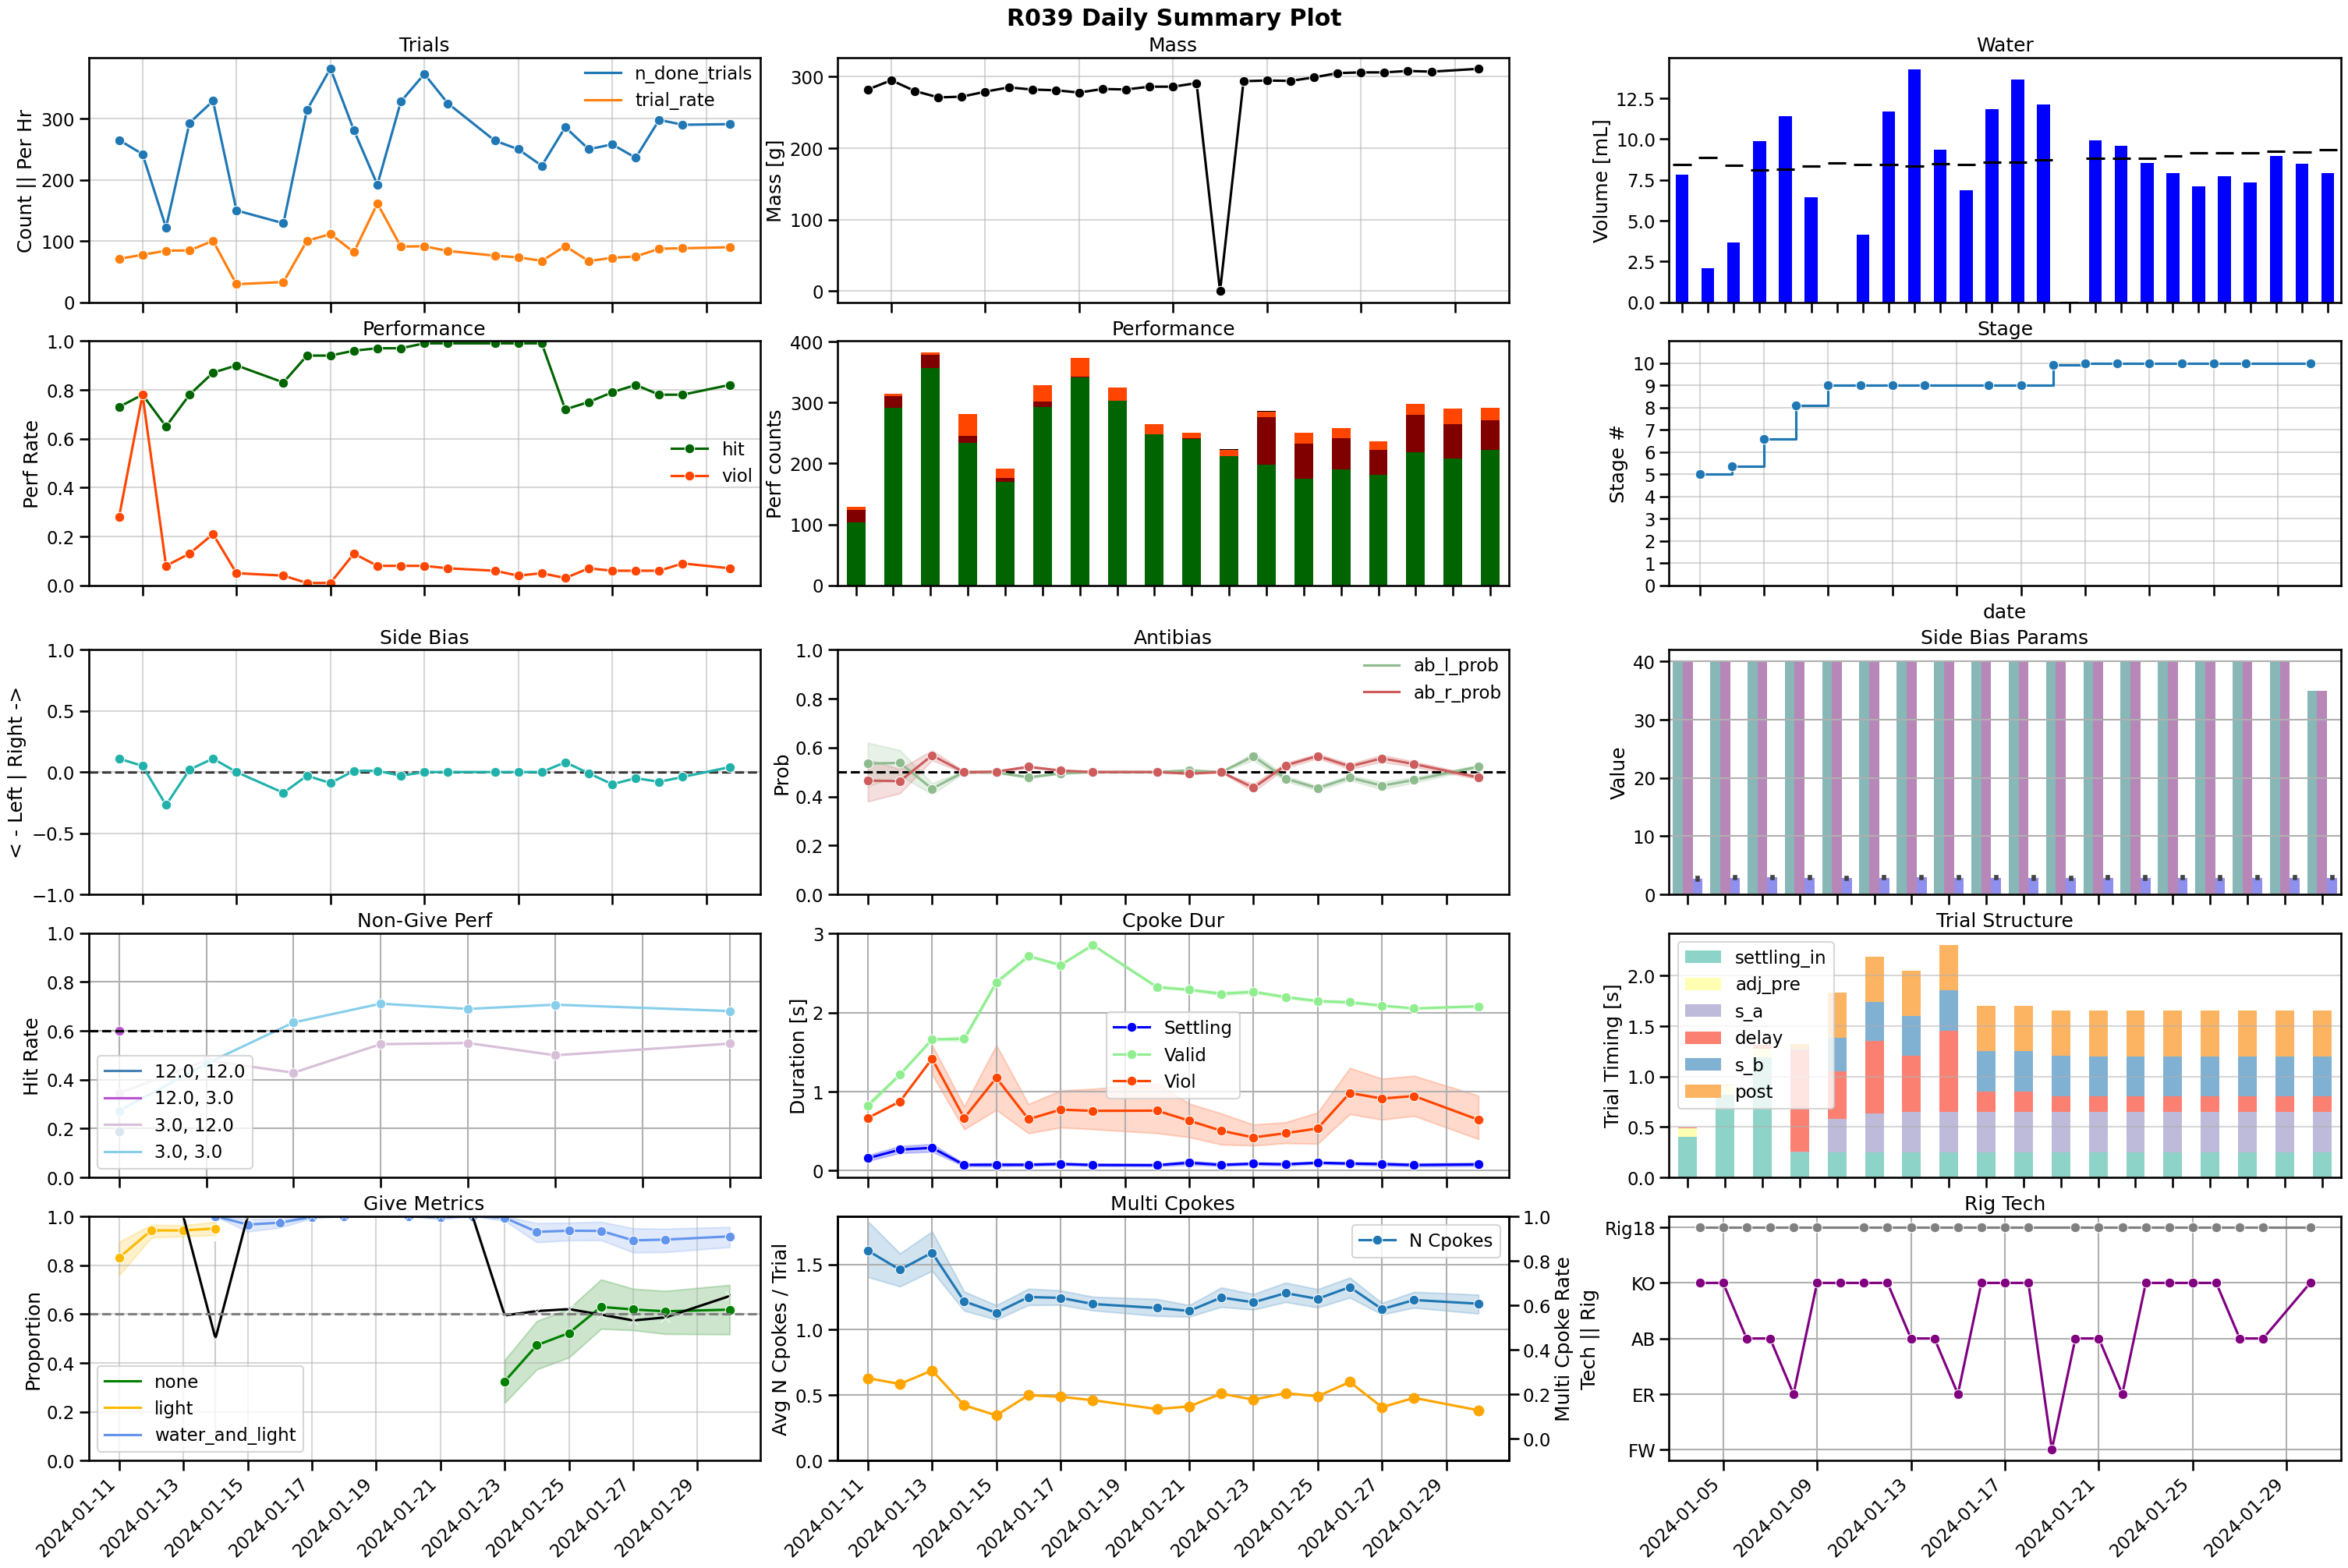

In [6]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )
    print(animal_id)

In [7]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R034_2024-01-11_day_summary
in cpoke stage but doesn't fit plot logic!
making R039_2024-01-14_day_summary
in cpoke stage but doesn't fit plot logic!
making R032_2024-01-16_day_summary
in cpoke stage but doesn't fit plot logic!
making R035_2024-01-17_day_summary
in cpoke stage but doesn't fit plot logic!
making R037_2024-01-18_day_summary
in cpoke stage but doesn't fit plot logic!
making R037_2024-01-24_day_summary
in cpoke stage but doesn't fit plot logic!
making R030_2024-01-30_day_summary
making R031_2024-01-30_day_summary
['s_a', 's_b', 'post', 'go']
making R032_2024-01-30_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R034_2024-01-30_day_summary
['s_a', 's_b', 'post', 'go']
making R035_2024-01-30_day_summary
['s_a', 's_b', 'post', 'go']
making R036_2024-01-30_day_summary
making R037_2024-01-30_day_summary
['delay', 's_b', 'post']
making R038_2024-01-30_day_summary
making R039_2024-01-30_day_summary
['adj_pre', 's_a', 's_b', 'go']
